# Lending Club Analysis

### <font color='Maroon'>Analysis Working sheet by Shakeeb Pasha and Vishal Khera</font>

In [1]:
# Importing the libraries needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup environmental parameters
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 150)

# Data Understanding

In [2]:
# Loading the file provided
loan_data = pd.read_csv('loan/loan.csv', low_memory=False)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65%   162.87       B     B2        NaN                       10+ years   
1  15.27%   59.83        C     C4        Ryder                     < 1 year    
2  15.96%   84.33        C     C5        NaN                       10+ years   
3  13.49%   339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69%   67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

  pymnt_plan  \
0  n           
1  n           
2  n           
3  n           
4  n           

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2  NaN                                                                                                                                                                                                                                                                                                          

In [3]:
loan_data.shape

(39717, 111)

In [4]:
loan_data.dtypes

id                                int64  
member_id                         int64  
loan_amnt                         int64  
funded_amnt                       int64  
funded_amnt_inv                   float64
term                              object 
int_rate                          object 
installment                       float64
grade                             object 
sub_grade                         object 
emp_title                         object 
emp_length                        object 
home_ownership                    object 
annual_inc                        float64
verification_status               object 
issue_d                           object 
loan_status                       object 
pymnt_plan                        object 
url                               object 
desc                              object 
purpose                           object 
title                             object 
zip_code                          object 
addr_state                        

# Data Cleanup

In [5]:
# Remove columns we are not going to use e.g. URL, description
loan_data = loan_data.drop(['url', 'desc'], axis = 1)

# convert percentages to number
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : float(x.split('%')[0]))
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x : float(str(x).split('%')[0]))

loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65     162.87       B     B2        NaN                       10+ years   
1  15.27     59.83        C     C4        Ryder                     < 1 year    
2  15.96     84.33        C     C5        NaN                       10+ years   
3  13.49     339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69     67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

  pymnt_plan         purpose                 title zip_code addr_state    dti  \
0  n          credit_card     Computer              860xx    AZ         27.65   
1  n          car             bike                  309xx    GA         1.00    
2  n          small_business  real estate business  606xx    IL         8.72    
3  n          other           personel              917xx    CA         20.00   
4  n          other           Personal              972xx    OR         17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0  0            Jan-85           1              NaN                       
1  0            Apr-99           5              NaN                       
2  0            Nov-01           2              NaN                       
3  0            Feb-96           1               35.0                     
4  0            Jan-96           0               38.0                     

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0 NaN                      3         0        13648      83.7         
1 NaN                      3         0        1687       9.4          
2 NaN                      2         0        2956       98.5         
3 NaN                      10        0        5598       21.0         
4 NaN                      15        0        27783      53.9         

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0  9          f                   0.00       0.00           5863.155187    
1  4          f                   0.00       0.00           1008.710000    
2  10         f                   0.00       0.00           3005.666844    
3  37         f                   0.00       0.00           12231.890000   
4  38         f                   524.06     524.06         3513.330000    

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0  5833.84          5000.00          863.16         0.00                 
1  1008.71          456.46           435.17         0.00                 
2  3005.67          2400.00          605.67         0.00                 
3  12231.89         10000.00         2214.92        16.97                
4  3513.33          2475.94          1037.39        0.00                 

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0  0.00        0.00                     Jan-15       171.62            
1  117.08      1.11                     Apr-13       119.66            
2  0.00        0.00                     Jun-14       649.91            
3  0.00        0.00                     Jan-15       357.4

In [6]:
# Function to provide missing values %
def print_missing_value_percentage(df):
    print('No of columns:', len(df.columns))
    print(round(100 * (df.isna().sum()/len(df.index)), 2))

In [7]:
print_missing_value_percentage(loan_data)

No of columns: 109
id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.71  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00  
dti                               0.00  
delinq_2yrs                       0.00

In [8]:
# drop columns where more than 50% missing na values
missing_value_columns = loan_data.columns[(loan_data.isna().sum()/len(loan_data.index)) >= 0.5]
print('No of columns with more than 50% missing values:', len(missing_value_columns))
loan_data = loan_data.drop(missing_value_columns, axis=1, inplace=False)
print('No of columns after dropping columns with more than 50% missing values:', len(loan_data.columns))

No of columns with more than 50% missing values: 57
No of columns after dropping columns with more than 50% missing values: 52


In [9]:
print_missing_value_percentage(loan_data)

No of columns: 52
id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
re

In [10]:
# Consider the columns with less than 10% and greater than 1% missing values
# emp_title, emp_length and pub_rec_bankruptcies
# Let's find the values that can be used to impute these columns

# emp_title - 6.19% missing values
loan_data['emp_title'].describe()

# since this is a categorical variable and that number of unique values
# is too high, we could use "mode" to impute, which is "US Army"

count     37258  
unique    28820  
top       US Army
freq      134    
Name: emp_title, dtype: object

In [11]:
# emp_length - 2.71% missing values
print(loan_data['emp_length'].describe())
print(loan_data['emp_length'].value_counts())

# since this is a categorical variable and that the count of one is higher than other categories,
# we could use "mode" to impute, which is "10+ years"

count     38642    
unique    11       
top       10+ years
freq      8879     
Name: emp_length, dtype: object
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [12]:
# pub_rec_bankruptcies - 1.75% missing values
print(loan_data['pub_rec_bankruptcies'].describe())
print(loan_data['pub_rec_bankruptcies'].value_counts())

# since this is a categorical variable and that the count of one is higher than other categories,
# we could use "mode" to impute, which is "0.0"

count    39020.000000
mean     0.043260    
std      0.204324    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      2.000000    
Name: pub_rec_bankruptcies, dtype: float64
0.0    37339
1.0    1674 
2.0    7    
Name: pub_rec_bankruptcies, dtype: int64


In [13]:
# Lets check on the columns that have data - the quality of the data
loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05  7456.670694   7187.238670    
min    5.473400e+04  7.069900e+04  500.000000    500.000000     
25%    5.162210e+05  6.667800e+05  5500.000000   5400.000000    
50%    6.656650e+05  8.508120e+05  10000.000000  9600.000000    
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment    annual_inc  \
count  39717.000000     39717.000000  39717.000000  3.971700e+04   
mean   10397.448868     12.021177     324.561922    6.896893e+04   
std    7128.450439      3.724825      208.874874    6.379377e+04   
min    0.000000         5.420000      15.690000     4.000000e+03   
25%    5000.000000      9.250000      167.020000    4.040400e+04   
50%    8975.000000      11.860000     280.220000    5.900000e+04   
75%    14400.000000     14.590000     430.780000    8.230000e+04   
max    35000.000000     24.590000     1305.190000   6.000000e+06   

                dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  39717.000000  39717.000000  39717.000000    39717.000000  39717.000000   
mean   13.315130     0.146512      0.869200        9.294408      0.055065       
std    6.678594      0.491812      1.070219        4.400282      0.237200       
min    0.000000      0.000000      0.000000        2.000000      0.000000       
25%    8.170000      0.000000      0.000000        6.000000      0.000000       
50%    13.400000     0.000000      1.000000        9.000000      0.000000       
75%    18.600000     0.000000      1.000000        12.000000     0.000000       
max    29.990000     11.000000     8.000000        44.000000     4.000000       

           revol_bal    revol_util     total_acc     out_prncp  out_prncp_inv  \
count  39717.000000   39667.000000  39717.000000  39717.000000  39717.000000    
mean   13382.528086   48.832152     22.088828     51.227887     50.989768       
std    15885.016641   28.332634     11.401709     375.172839    373.824457      
min    0.000000       0.000000      2.000000      0.000000      0.000000        
25%    3703.000000    25.400000     13.000000     0.000000      0.000000        
50%    8850.000000    49.300000     20.000000     0.000000      0.000000        
75%    17058.000000   72.400000     29.000000     0.000000      0.000000        
max    149588.000000  99.900000     90.000000     6311.470000   6307.370000     

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  39717.000000  39717.000000     39717.000000     39717.000000    
mean   12153.596544  11567.149118     9793.348813      2263.663172     
std    9042.040766   8942.672613      7065.522127      2608.111964     
min    0.000000      0.000000         0.000000         0.000000        
25%    5576.930000   5112.310000      4600.000000      662.180000      
50%    9899.640319   9287.150000      8000.000000      1348.910000     
75%    16534.433040  15798.810000     13653.260000     2833.400000     
max    58563.679930  58563.680000     35000.020000     23563.680000    

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count  39717.000000        39717.000000  39717.000000              
mean   1.363015            95.221624     12.406112                 
std    7.289979            688.744771    148.671593                
min    0.000000            0.000000      0.000000                  
25%    0.000000            0.000000      0.000000                  
50%    0.000000            0.000000      0.000000                  
75%    0.000000            0.000000      0.000000                  
max    180.200000          29623.350000  7002.190000               

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count  39717.000000     39661

In [14]:
'''
From the describe above it makes sense to drop 
#   tax_liens, 
#   delinq_amnt, 
#   chargeoff_within_12_mths, 
#   acc_now_delinq, 
#   collections_12_mths_ex_med
as they all have 0 values for all statistical parameters,
which means they all have a 0 value across
'''
loan_data = loan_data.drop(['tax_liens','delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq', 'collections_12_mths_ex_med'], axis = 1)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65     162.87       B     B2        NaN                       10+ years   
1  15.27     59.83        C     C4        Ryder                     < 1 year    
2  15.96     84.33        C     C5        NaN                       10+ years   
3  13.49     339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69     67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

  pymnt_plan         purpose                 title zip_code addr_state    dti  \
0  n          credit_card     Computer              860xx    AZ         27.65   
1  n          car             bike                  309xx    GA         1.00    
2  n          small_business  real estate business  606xx    IL         8.72    
3  n          other           personel              917xx    CA         20.00   
4  n          other           Personal              972xx    OR         17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  0            Jan-85           1               3         0        13648       
1  0            Apr-99           5               3         0        1687        
2  0            Nov-01           2               2         0        2956        
3  0            Feb-96           1               10        0        5598        
4  0            Jan-96           0               15        0        27783       

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0  83.7        9          f                   0.00       0.00            
1  9.4         4          f                   0.00       0.00            
2  98.5        10         f                   0.00       0.00            
3  21.0        37         f                   0.00       0.00            
4  53.9        38         f                   524.06     524.06          

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0  5863.155187   5833.84          5000.00          863.16          
1  1008.710000   1008.71          456.46           435.17          
2  3005.666844   3005.67          2400.00          605.67          
3  12231.890000  12231.89         10000.00         2214.92         
4  3513.330000   3513.33          2475.94          1037.39         

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0  0.00                0.00        0.00                     Jan-15        
1  0.00                117.08      1.11                     Apr-13        
2  0.00                0.00        0.00                     Jun-14        
3  16.97               0.00        0.00                     Jan-15        
4  0.00                0.00        0.00                     May-16        

   last_pymnt_amnt last_credit_pull_d  policy_code application_type  \
0  171.62           May-16             1            INDIVIDUAL        
1  119.66           Sep-13             1            INDIVIDUAL        
2  649.91           May-16             1            INDIVIDUAL        
3  357.48           Apr-16             1          

In [15]:
# Drop columns with single unique values - They dont have any value
loan_data = loan_data[[c for c in loan_data.columns if loan_data[c].nunique() > 1]]
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65     162.87       B     B2        NaN                       10+ years   
1  15.27     59.83        C     C4        Ryder                     < 1 year    
2  15.96     84.33        C     C5        NaN                       10+ years   
3  13.49     339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69     67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

          purpose                 title zip_code addr_state    dti  \
0  credit_card     Computer              860xx    AZ         27.65   
1  car             bike                  309xx    GA         1.00    
2  small_business  real estate business  606xx    IL         8.72    
3  other           personel              917xx    CA         20.00   
4  other           Personal              972xx    OR         17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  0            Jan-85           1               3         0        13648       
1  0            Apr-99           5               3         0        1687        
2  0            Nov-01           2               2         0        2956        
3  0            Feb-96           1               10        0        5598        
4  0            Jan-96           0               15        0        27783       

   revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0  83.7        9          0.00       0.00           5863.155187    
1  9.4         4          0.00       0.00           1008.710000    
2  98.5        10         0.00       0.00           3005.666844    
3  21.0        37         0.00       0.00           12231.890000   
4  53.9        38         524.06     524.06         3513.330000    

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0  5833.84          5000.00          863.16         0.00                 
1  1008.71          456.46           435.17         0.00                 
2  3005.67          2400.00          605.67         0.00                 
3  12231.89         10000.00         2214.92        16.97                
4  3513.33          2475.94          1037.39        0.00                 

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0  0.00        0.00                     Jan-15       171.62            
1  117.08      1.11                     Apr-13       119.66            
2  0.00        0.00                     Jun-14       649.91            
3  0.00        0.00                     Jan-15       357.48            
4  0.00        0.00                     May-16       67.79             

  last_credit_pull_d  pub_rec_bankruptcies  
0  May-16             0.0                   
1  Sep-13             0.0                   
2  May-16             0.0                   
3  Apr-16             0.0                   
4  May-16             0.0

In [16]:
# drop any duplicate rows
loan_data = loan_data.drop_duplicates(subset=None, keep='first')
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65     162.87       B     B2        NaN                       10+ years   
1  15.27     59.83        C     C4        Ryder                     < 1 year    
2  15.96     84.33        C     C5        NaN                       10+ years   
3  13.49     339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69     67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

          purpose                 title zip_code addr_state    dti  \
0  credit_card     Computer              860xx    AZ         27.65   
1  car             bike                  309xx    GA         1.00    
2  small_business  real estate business  606xx    IL         8.72    
3  other           personel              917xx    CA         20.00   
4  other           Personal              972xx    OR         17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  0            Jan-85           1               3         0        13648       
1  0            Apr-99           5               3         0        1687        
2  0            Nov-01           2               2         0        2956        
3  0            Feb-96           1               10        0        5598        
4  0            Jan-96           0               15        0        27783       

   revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0  83.7        9          0.00       0.00           5863.155187    
1  9.4         4          0.00       0.00           1008.710000    
2  98.5        10         0.00       0.00           3005.666844    
3  21.0        37         0.00       0.00           12231.890000   
4  53.9        38         524.06     524.06         3513.330000    

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0  5833.84          5000.00          863.16         0.00                 
1  1008.71          456.46           435.17         0.00                 
2  3005.67          2400.00          605.67         0.00                 
3  12231.89         10000.00         2214.92        16.97                
4  3513.33          2475.94          1037.39        0.00                 

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0  0.00        0.00                     Jan-15       171.62            
1  117.08      1.11                     Apr-13       119.66            
2  0.00        0.00                     Jun-14       649.91            
3  0.00        0.00                     Jan-15       357.48            
4  0.00        0.00                     May-16       67.79             

  last_credit_pull_d  pub_rec_bankruptcies  
0  May-16             0.0                   
1  Sep-13             0.0                   
2  May-16             0.0                   
3  Apr-16             0.0                   
4  May-16             0.0

In [17]:
# drop rows with all values nan
print('Before dropping nan rows: ', loan_data.shape)
loan_data = loan_data[~loan_data.isna().all(1)]
print('After dropping nan rows: ', loan_data.shape)

Before dropping nan rows:  (39717, 43)
After dropping nan rows:  (39717, 43)


# Univariate Analysis

#### Reusable Functions

In [18]:
# Function to Plot a distribution given a dataframe and column
def head_and_line_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot()
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    plt.show()

def head_and_bar_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[col].value_counts().head())
    sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel) 
    plt.xticks(rotation=90)
    plt.show()

def head_and_pie_plot(df, col, ptitle='Breakup'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(ptitle)
    plt.show()

In [19]:
# List of Columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

#### Categorizing variables
![categories](https://i.ibb.co/7r5TKPg/pic2.png)

In [20]:
# we will drop all the customer Behavior metrics as these are the events happening after the loan is disbursed
loan_data = loan_data.drop(columns=[
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
    'revol_bal',
    'revol_util'
])
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### Variables
![variables](https://i.ibb.co/mb77HzX/pic1.png)

In [21]:
# drop columns not relevant for analysis
loan_data = loan_data.drop(columns=[
    'earliest_cr_line',
    'id',
    'member_id',
    'zip_code'
])
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
4  3000       3000         3000.0            60 months  12.69     67.79         

  grade sub_grade                 emp_title emp_length home_ownership  \
0  B     B2        NaN                       10+ years  RENT            
1  C     C4        Ryder                     < 1 year   RENT            
2  C     C5        NaN                       10+ years  RENT            
3  C     C1        AIR RESOURCES BOARD       10+ years  RENT            
4  B     B5        University Medical Group  1 year     RENT            

   annual_inc verification_status issue_d  loan_status         purpose  \
0  24000.0     Verified            Dec-11  Fully Paid   credit_card      
1  30000.0     Source Verified     Dec-11  Charged Off  car              
2  12252.0     Not Verified        Dec-11  Fully Paid   small_business   
3  49200.0     Source Verified     Dec-11  Fully Paid   other            
4  80000.0     Source Verified     Dec-11  Current      other            

                  title addr_state    dti  delinq_2yrs  inq_last_6mths  \
0  Computer              AZ         27.65  0            1                
1  bike                  GA         1.00   0            5                
2  real estate business  IL         8.72   0            2                
3  personel              CA         20.00  0            1                
4  Personal              OR         17.94  0            0                

   open_acc  pub_rec  total_acc  pub_rec_bankruptcies  
0  3         0        9          0.0                   
1  3         0        4          0.0                   
2  2         0        10         0.0                   
3  10        0        37         0.0                   
4  15        0        38         0.0

## Categorical Variables
### Unordered categorical

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
Name: addr_state, dtype: int64


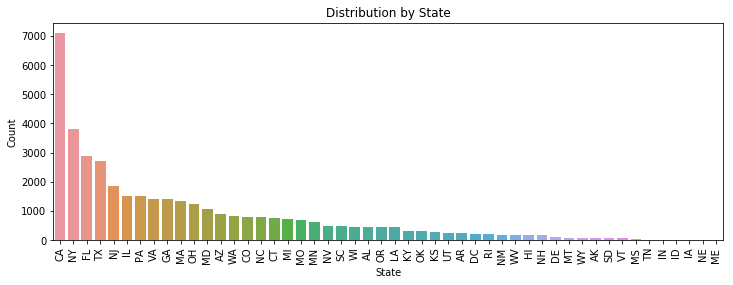

In [22]:
head_and_bar_plot(loan_data, 'addr_state', 'Distribution by State', 'State','Count')

#### <font color='Maroon'>Insights - Majority of the business is in 10 states</font>

Not Verified       16921
Verified           12809
Source Verified    9987 
Name: verification_status, dtype: int64


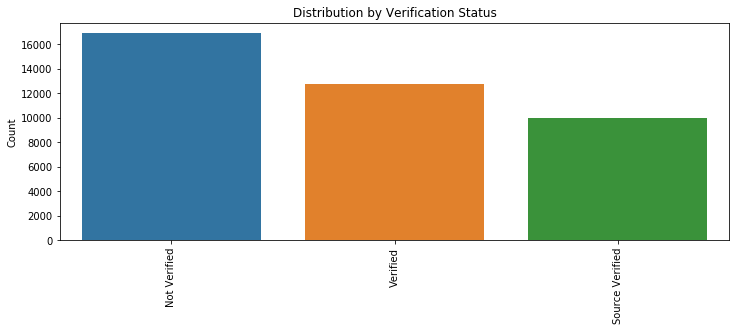

In [23]:
head_and_bar_plot(loan_data, 'verification_status', 'Distribution by Verification Status', '' ,'Count')

#### <font color='Maroon'>Insights - A significant portion of the loans shows are not verified</font>

debt_consolidation    18641
credit_card           5130 
other                 3993 
home_improvement      2976 
major_purchase        2187 
Name: purpose, dtype: int64


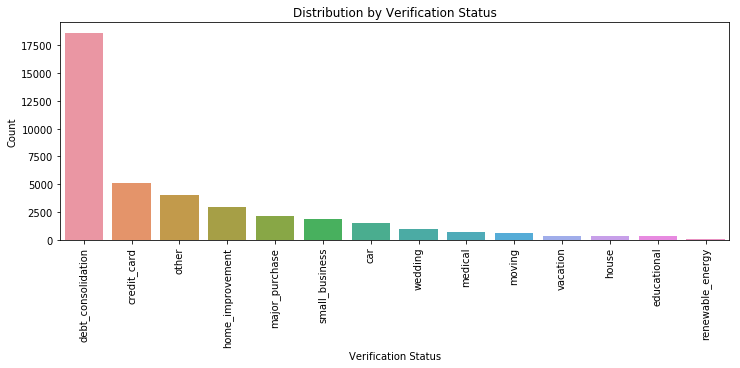

In [24]:
head_and_bar_plot(loan_data, 'purpose','Distribution by Verification Status', 'Verification Status' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are for Debt Consolidation</font>

RENT        18899
MORTGAGE    17659
OWN         3058 
OTHER       98   
NONE        3    
Name: home_ownership, dtype: int64


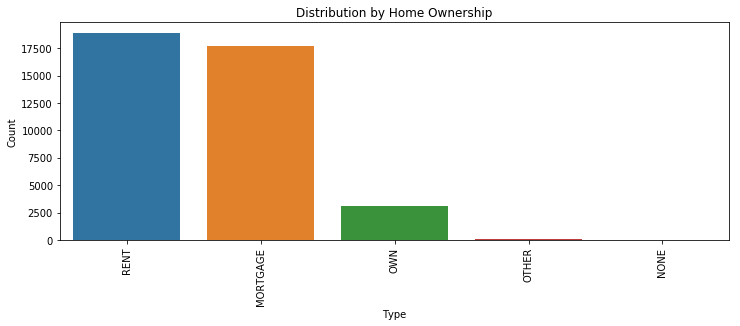

In [25]:
head_and_bar_plot(loan_data, 'home_ownership', 'Distribution by Home Ownership', 'Type' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are by people with rented / mortgaged homes</font>

### Ordered categorical variables

 36 months    29096
 60 months    10621
Name: term, dtype: int64


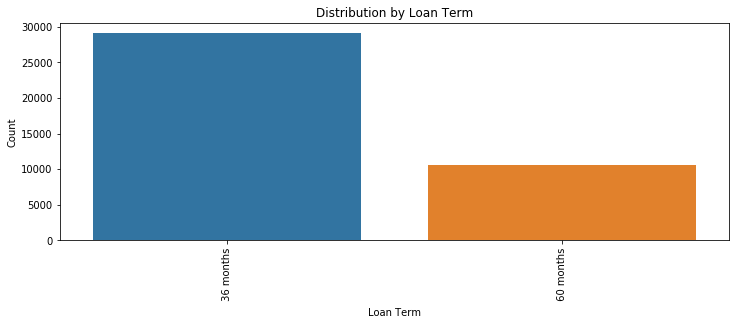

In [26]:
head_and_bar_plot(loan_data, 'term', 'Distribution by Loan Term', 'Loan Term' ,'Count')

In [27]:
#TODO - Check with is NotAvailable coming, it should not be there.

#### <font color='Maroon'>Insights - Almost 75% of the loans are of tenure 36 months</font>

In [28]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [29]:
# Replace the nan values in the table to NotAvailable
loan_data.loc[loan_data['emp_length'].isnull(), 'emp_length'] = 'NotAvailable'
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years',
       'NotAvailable'], dtype=object)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
Name: emp_length, dtype: int64


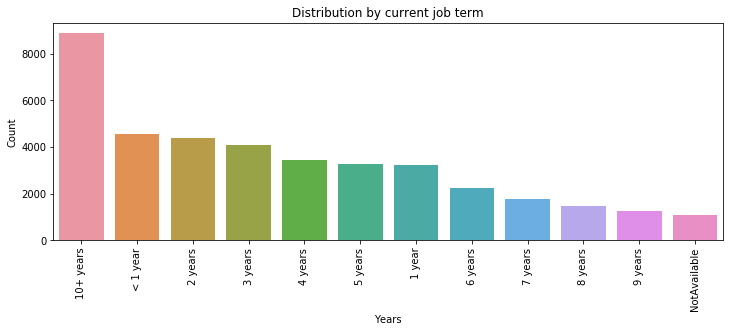

In [30]:
head_and_bar_plot(loan_data, 'emp_length', 'Distribution by current job term', 'Years' ,'Count')

#### <font color='Maroon'>Insights - Majority of Loans are given to people with  jobs. There are close to 1000 people who have not disclosed or are not in jobs</font>

B    12020
A    10085
C    8098 
D    5307 
E    2842 
Name: grade, dtype: int64


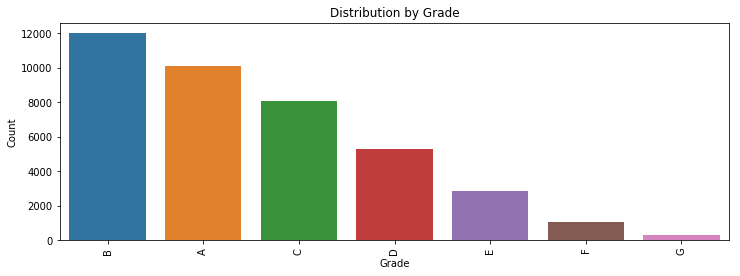

In [31]:
head_and_bar_plot(loan_data, 'grade', 'Distribution by Grade', 'Grade' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans are with A,B and C gradings</font>

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
Name: sub_grade, dtype: int64


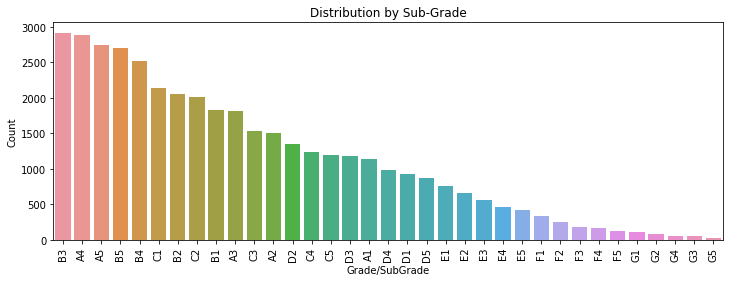

In [32]:
head_and_bar_plot(loan_data, 'sub_grade', 'Distribution by Sub-Grade', 'Grade/SubGrade' ,'Count')

In [33]:
loan_data['emp_title'].value_counts().head()

US Army              134
Bank of America      109
IBM                  66 
AT&T                 59 
Kaiser Permanente    56 
Name: emp_title, dtype: int64

#### <font color='Maroon'>Insights - Employee Title Contains too much text, no processing done on this column</font>

   loan_status
0  Fully Paid 
1  Charged Off
2  Fully Paid 
3  Fully Paid 
4  Current    


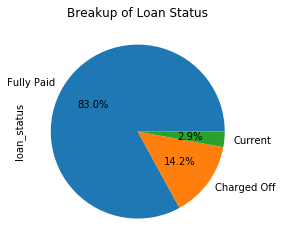

In [34]:
head_and_pie_plot(loan_data, 'loan_status', "Breakup of Loan Status")

#### <font color='Maroon'>Insights - 83.0% of loans have been closed, 14.2% of loans have gone bad</font>


0    37601
1    2056 
2    51   
3    7    
4    2    
Name: pub_rec, dtype: int64


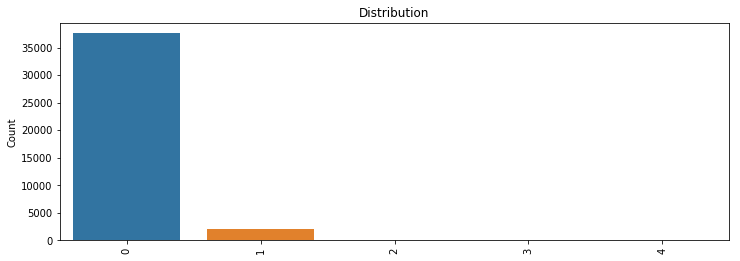

In [35]:
head_and_bar_plot(loan_data, 'pub_rec')
# one public record seems related to the number of defaults as well

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Name: issue_d, dtype: int64


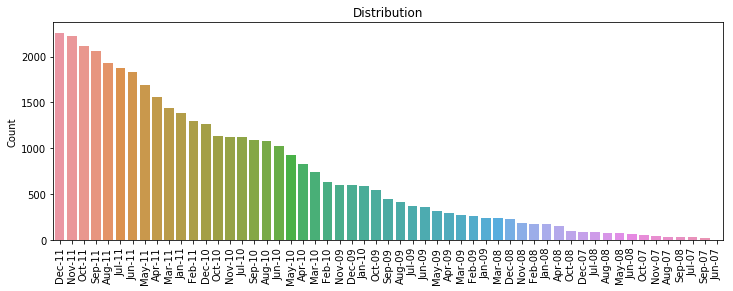

In [36]:
head_and_bar_plot(loan_data, 'issue_d')
# can possibly consider months impact

0    19300
1    10971
2    5812 
3    3048 
4    326  
Name: inq_last_6mths, dtype: int64


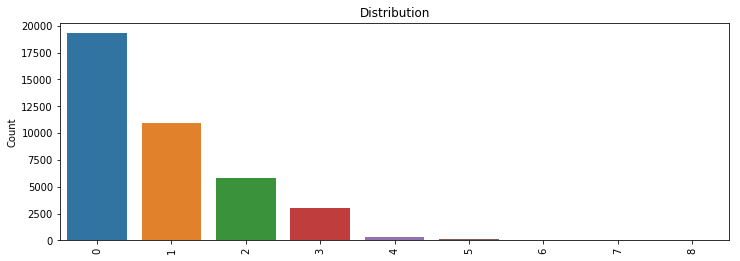

In [37]:
head_and_bar_plot(loan_data, 'inq_last_6mths')
# looks like not many loan applications with more than 4 inquiries were approved

0.0    37339
1.0    1674 
2.0    7    
Name: pub_rec_bankruptcies, dtype: int64


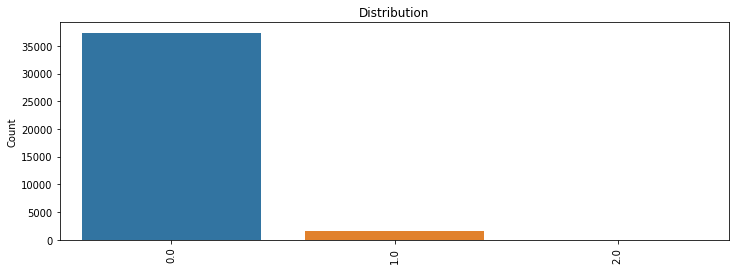

In [38]:
head_and_bar_plot(loan_data, 'pub_rec_bankruptcies')
# majority of loans are for 0 public record bankruptcies, but some given out for people with 1 records

0    35405
1    3303 
2    687  
3    220  
4    62   
Name: delinq_2yrs, dtype: int64


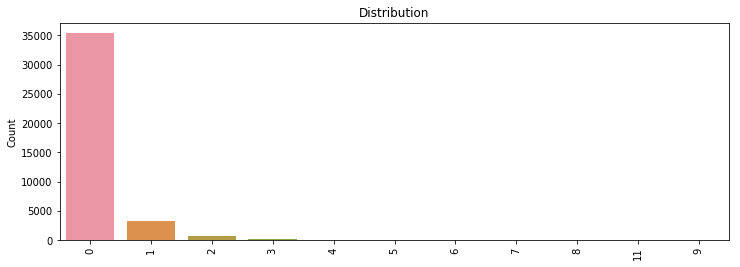

In [39]:
head_and_bar_plot(loan_data, 'delinq_2yrs')
# number 1 corresponds to default rate

7     4018
6     3946
8     3936
9     3718
10    3223
Name: open_acc, dtype: int64


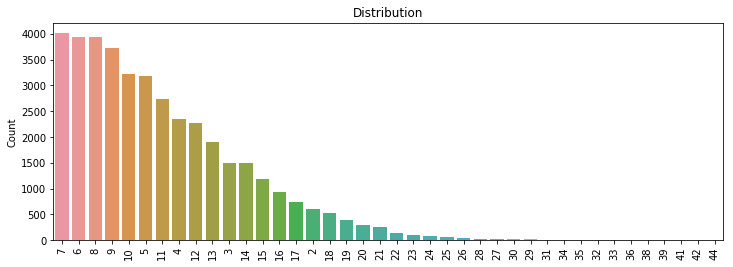

In [40]:
head_and_bar_plot(loan_data, 'open_acc')
# seems like people with 5-10 accs have highest applications

### Continuous variables

In [41]:
loan_data[['int_rate', 'loan_amnt', 'installment', 'dti', 'funded_amnt', 'annual_inc']].describe()

int_rate     loan_amnt   installment           dti   funded_amnt  \
count  39717.000000  39717.000000  39717.000000  39717.000000  39717.000000   
mean   12.021177     11219.443815  324.561922    13.315130     10947.713196   
std    3.724825      7456.670694   208.874874    6.678594      7187.238670    
min    5.420000      500.000000    15.690000     0.000000      500.000000     
25%    9.250000      5500.000000   167.020000    8.170000      5400.000000    
50%    11.860000     10000.000000  280.220000    13.400000     9600.000000    
75%    14.590000     15000.000000  430.780000    18.600000     15000.000000   
max    24.590000     35000.000000  1305.190000   29.990000     35000.000000   

         annual_inc  
count  3.971700e+04  
mean   6.896893e+04  
std    6.379377e+04  
min    4.000000e+03  
25%    4.040400e+04  
50%    5.900000e+04  
75%    8.230000e+04  
max    6.000000e+06

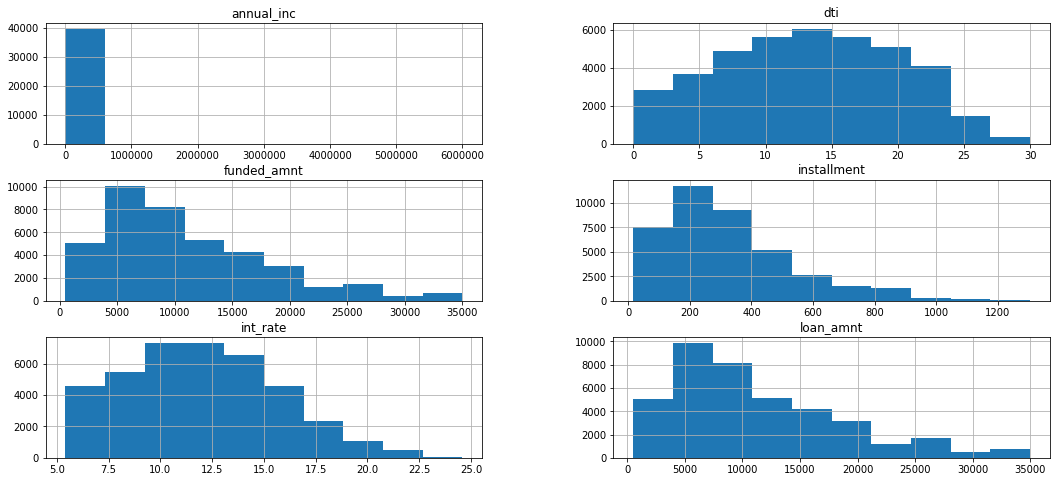

In [42]:
loan_data[['int_rate', 'loan_amnt', 'installment', 'dti', 'funded_amnt', 'annual_inc']].hist(figsize=(18,8))
plt.show()

In [43]:
# visualize outlier removal
def box_plot_remove_outlier(df, col, val):
    plt.figure(figsize=(12, 6))
    print(f'{col} : outlier cutoff={val}')
    df[[col]].plot.box(ax=plt.subplot(121))
    df[df[col] <= val][col].plot.box(ax=plt.subplot(122))
    plt.show()

int_rate : outlier cutoff=22


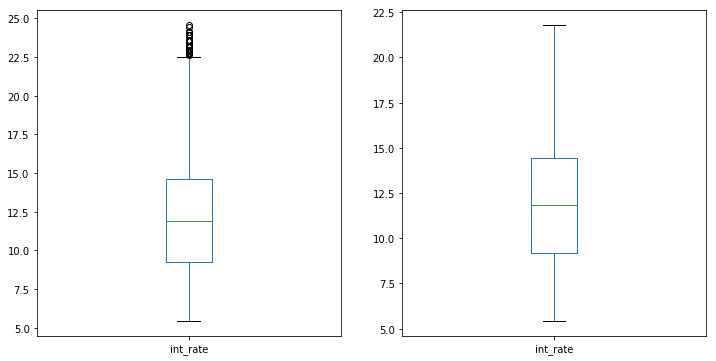

loan_amnt : outlier cutoff=28000


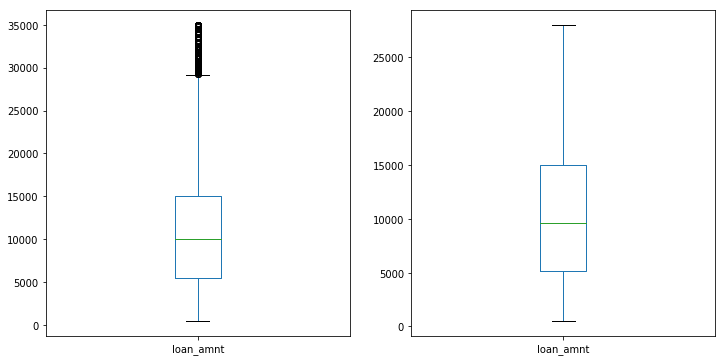

installment : outlier cutoff=750


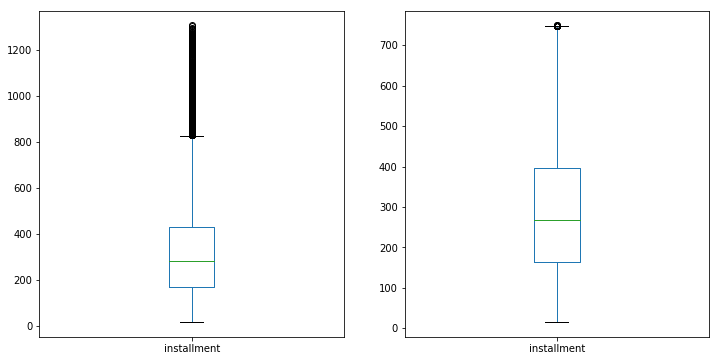

dti : outlier cutoff=30


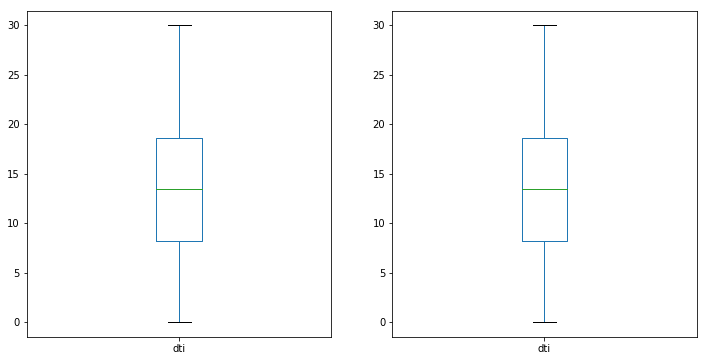

funded_amnt : outlier cutoff=30000


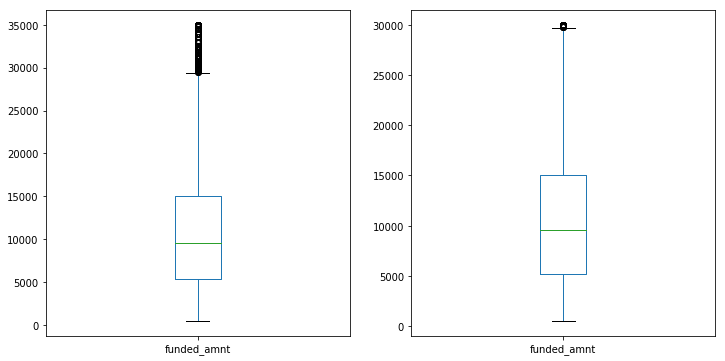

annual_inc : outlier cutoff=82300.0


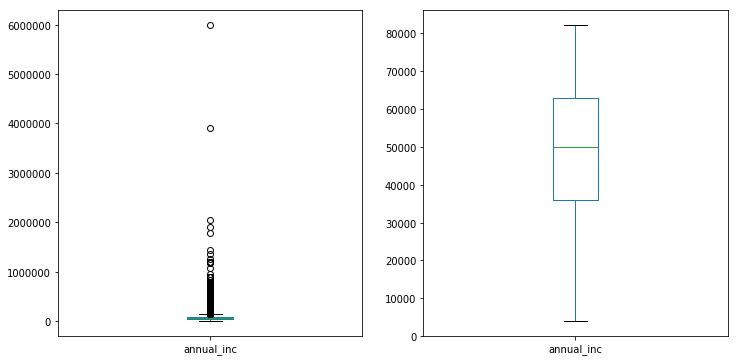

In [44]:
outlier_maps = {'int_rate': 22, # dont want to apply outlier treatment
                'loan_amnt': 28000,
                'installment': 750, 
                'dti': 30, 
                'funded_amnt': 30000,
                'annual_inc': 8.230000e+04}
for col, val in outlier_maps.items():
    box_plot_remove_outlier(loan_data, col, val)

# Segemented Univariate Analysis
Loan processing being the key objective we are looking at 2 kinds of analysis. Defaulted loans and Good or paid up loans. The Loans that are currently active will be excluded from the study

In [45]:
# remove rows with loan_status as "Current"
loan_data = loan_data[loan_data['loan_status'] != "Current"]
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
5  5000       5000         5000.0            36 months  7.90      156.46        

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0  B     B2        NaN                   10+ years  RENT           24000.0      
1  C     C4        Ryder                 < 1 year   RENT           30000.0      
2  C     C5        NaN                   10+ years  RENT           12252.0      
3  C     C1        AIR RESOURCES BOARD   10+ years  RENT           49200.0      
5  A     A4        Veolia Transportaton  3 years    RENT           36000.0      

  verification_status issue_d  loan_status         purpose  \
0  Verified            Dec-11  Fully Paid   credit_card      
1  Source Verified     Dec-11  Charged Off  car              
2  Not Verified        Dec-11  Fully Paid   small_business   
3  Source Verified     Dec-11  Fully Paid   other            
5  Source Verified     Dec-11  Fully Paid   wedding          

                                   title addr_state    dti  delinq_2yrs  \
0  Computer                               AZ         27.65  0             
1  bike                                   GA         1.00   0             
2  real estate business                   IL         8.72   0             
3  personel                               CA         20.00  0             
5  My wedding loan I promise to pay back  AZ         11.20  0             

   inq_last_6mths  open_acc  pub_rec  total_acc  pub_rec_bankruptcies  
0  1               3         0        9          0.0                   
1  5               3         0        4          0.0                   
2  2               2         0        10         0.0                   
3  1               10        0        37         0.0                   
5  3               9         0        12         0.0

In [46]:
# Reusable Functions
def group_and_default_rate(col, ptitle='Defaults Distribution', pxlabel='', pylabel='Percent', df=loan_data):
    # Set labels
    pylabel='Percent'
    py2label = 'Count of Bad Loans'

    # Process Information
    p_table = df.groupby([col, 'loan_status']).count()[['loan_amnt']]
    p_table = p_table.rename(columns={"loan_amnt":"count"})
    p_table = p_table.reset_index()
    totals_table = p_table.groupby(col).sum()
    p_table['totals'] = p_table[col].apply(lambda x : totals_table.loc[x]['count'])
    p_table['rate'] = round(100*(p_table['count']/p_table['totals']))

    # Plot Column chart of col Left hand chart 
    p_table_top50 = p_table[p_table['loan_status'] == 'Charged Off'][[col,'totals', 'count',  'rate']] \
            .sort_values('rate', ascending=False) \
            .head(50) \
            .reset_index(drop=True)
    
    plt.figure(figsize=(18, 6))
    sns.barplot(x=col, y='rate', data=p_table_top50, label='% Bad Loans', order=p_table_top50[col])
    
    plt.xticks(rotation=90)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    # Plot Charged off loans guideline i.e. 14% 
    plt.axhline(y=14, linewidth=1.00, color='r', ls='--')

    # Hack to add 2nd Chart legend to primary and we supress the 2nd
    plt.plot(np.nan, color='tab:green', label = 'Count of Bad Loans')
    plt.plot(np.nan, color='tab:red',ls='--', label = 'Average % of Bad Loans')
    plt.legend()

    # Create 2nd line chart of count count of corresponding bad loans - Right hand chart 
    plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
    plt2.tick_params(axis='y', labelcolor='tab:green')
    sns.pointplot(x=col, y='count', data=p_table_top50, color='tab:green', marker='o', ax=plt2, label='Count', order=p_table_top50[col])
    plt2.set_ylabel(py2label, color='tab:green')  # we already handled the x-label with ax1

    plt.show()

    print(p_table_top50.head())

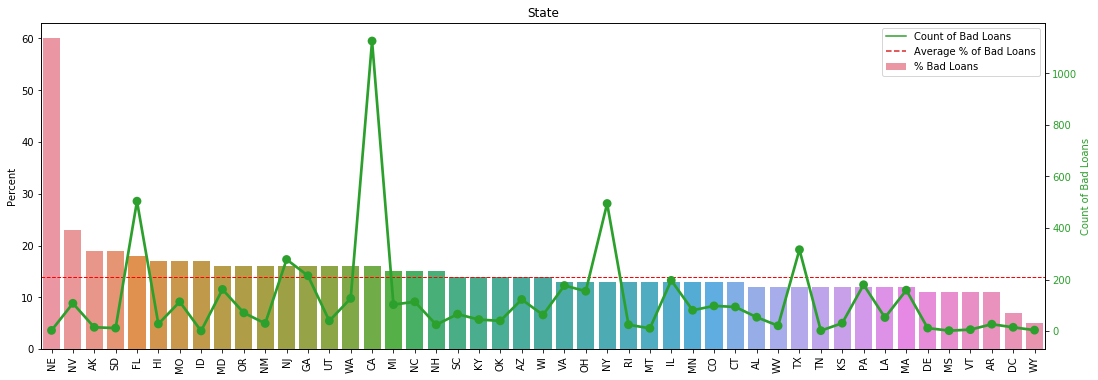

  addr_state  totals  count  rate
0  NE         5       3      60.0
1  NV         479     108    23.0
2  AK         78      15     19.0
3  SD         62      12     19.0
4  FL         2781    504    18.0


In [47]:
# is there any relation w.r.t addr_state and default rate
group_and_default_rate('addr_state', 'State')

# Nebraska and Nevada have unusually high rate of defaults

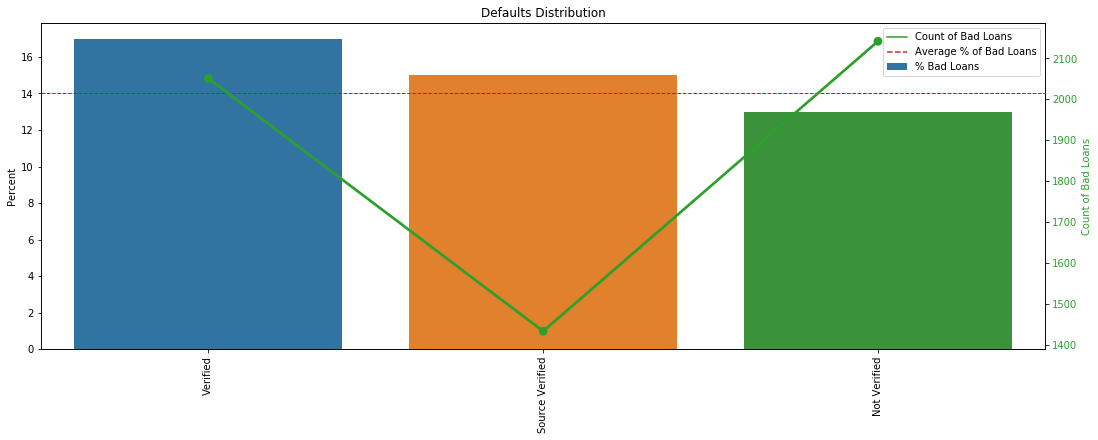

  verification_status  totals  count  rate
0  Verified            12206   2051   17.0
1  Source Verified     9677    1434   15.0
2  Not Verified        16694   2142   13.0


In [48]:
# is there any relation w.r.t verification_status and default rate
group_and_default_rate('verification_status')
# not much difference, infact verified applicants have higher default rate!

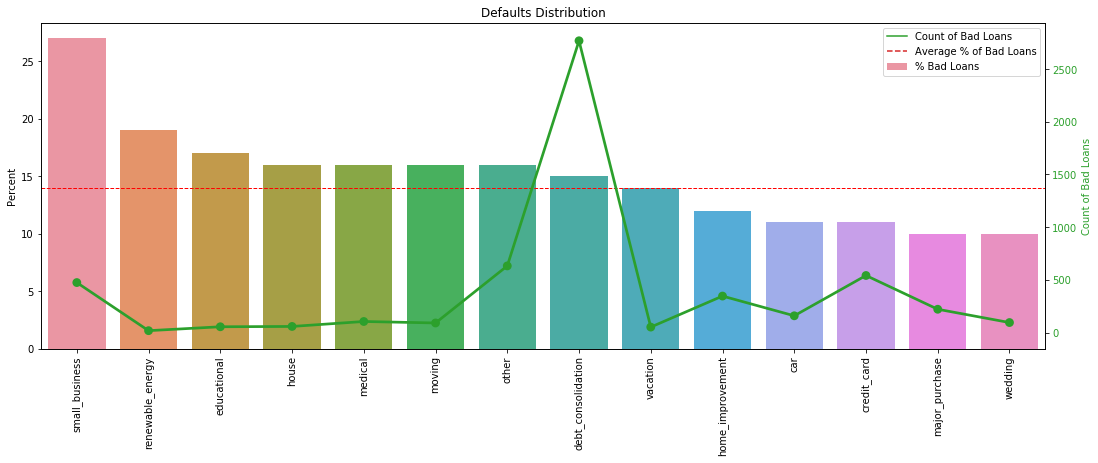

            purpose  totals  count  rate
0  small_business    1754    475    27.0
1  renewable_energy  102     19     19.0
2  educational       325     56     17.0
3  house             367     59     16.0
4  medical           681     106    16.0


In [49]:
# is there any relation w.r.t purpose of loan and default rate
group_and_default_rate('purpose')
# very IMP - small_business loans have higher share of default rates

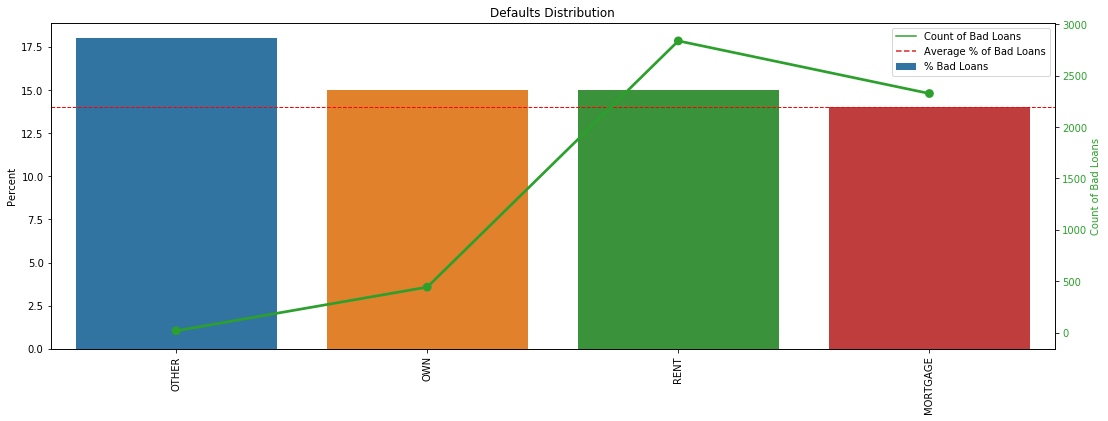

  home_ownership  totals  count  rate
0  OTHER          98      18     18.0
1  OWN            2975    443    15.0
2  RENT           18480   2839   15.0
3  MORTGAGE       17021   2327   14.0


In [50]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('home_ownership')
# not sure what others refer to. But people with mortgage have less rate.

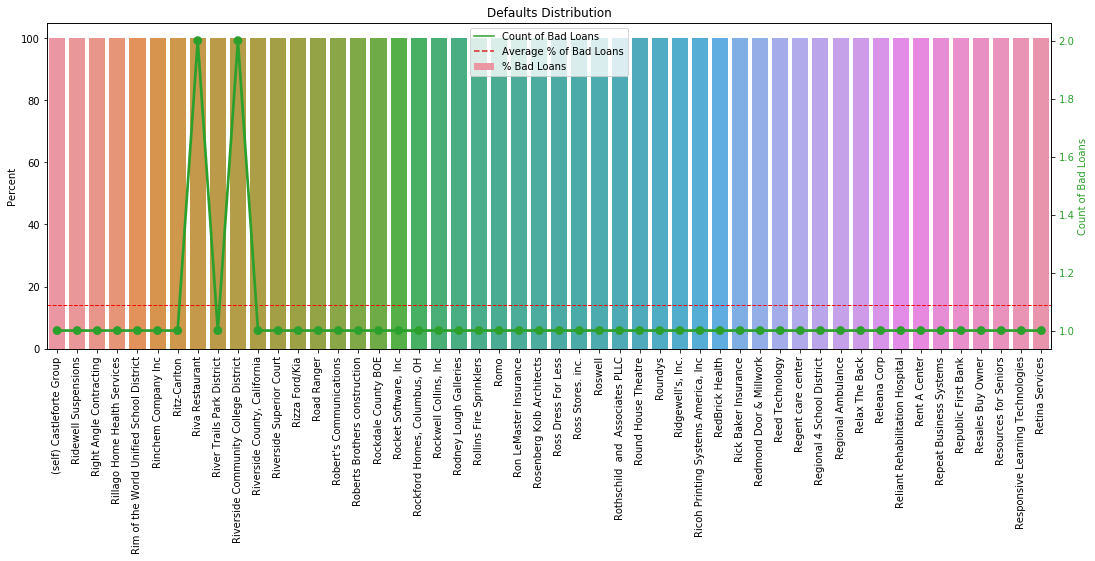

                                  emp_title  totals  count   rate
0  (self) Castleforte Group                  1       1      100.0
1  Ridewell Suspensions                      1       1      100.0
2  Right Angle Contracting                   1       1      100.0
3  Rillago Home Health Services              1       1      100.0
4  Rim of the World Unified School District  1       1      100.0


In [51]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('emp_title')
# looks like people have 100% default rate from specific companies.

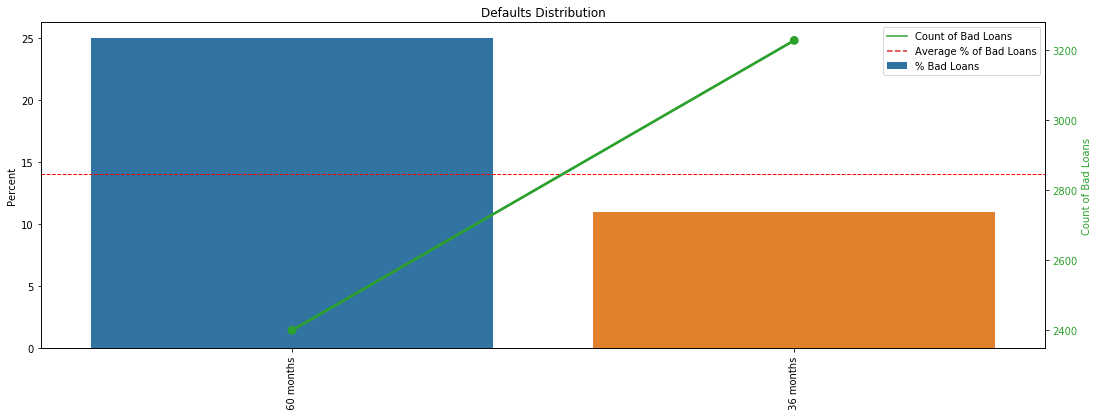

         term  totals  count  rate
0   60 months  9481    2400   25.0
1   36 months  29096   3227   11.0


In [52]:
# is there any relation w.r.t term and default rate
group_and_default_rate('term')
# longer duration loans have higher default rate

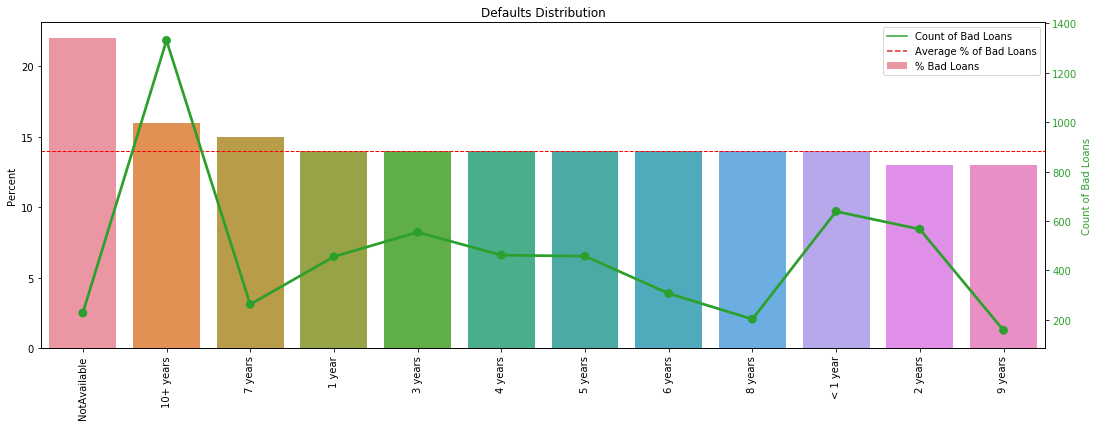

     emp_length  totals  count  rate
0  NotAvailable  1033    228    22.0
1  10+ years     8488    1331   16.0
2  7 years       1711    263    15.0
3  1 year        3169    456    14.0
4  3 years       4012    555    14.0


In [53]:
# is there any relation w.r.t emp_length and default rate
group_and_default_rate('emp_length')
# not much relation.

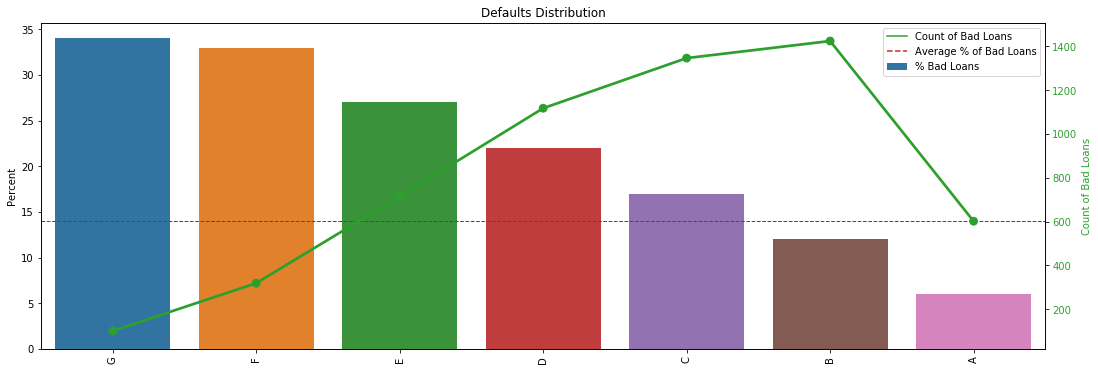

  grade  totals  count  rate
0  G     299     101    34.0
1  F     976     319    33.0
2  E     2663    715    27.0
3  D     5085    1118   22.0
4  C     7834    1347   17.0


In [54]:
# is there any relation w.r.t grade and default rate
group_and_default_rate('grade')
# Only A and to some extent B grades are better performers.

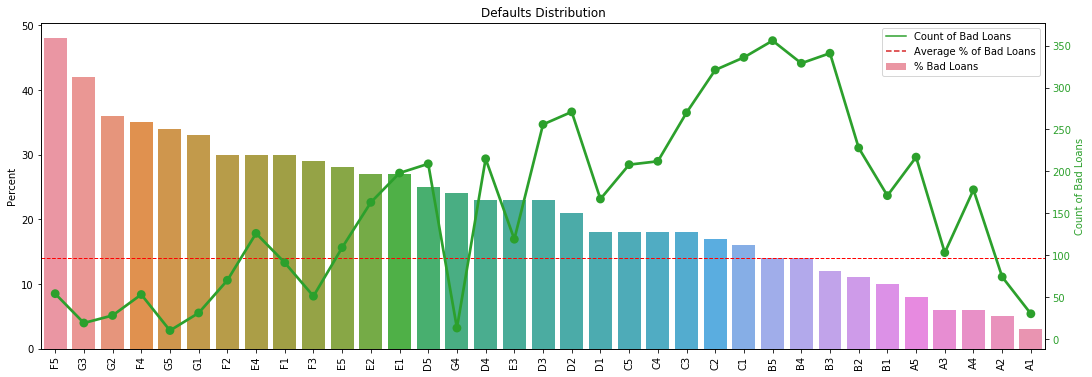

  sub_grade  totals  count  rate
0  F5        113     54     48.0
1  G3        45      19     42.0
2  G2        77      28     36.0
3  F4        151     53     35.0
4  G5        29      10     34.0


In [55]:
# is there any relation w.r.t sub_grade and default rate
group_and_default_rate('sub_grade')
# some sub grades have out of norm performances.

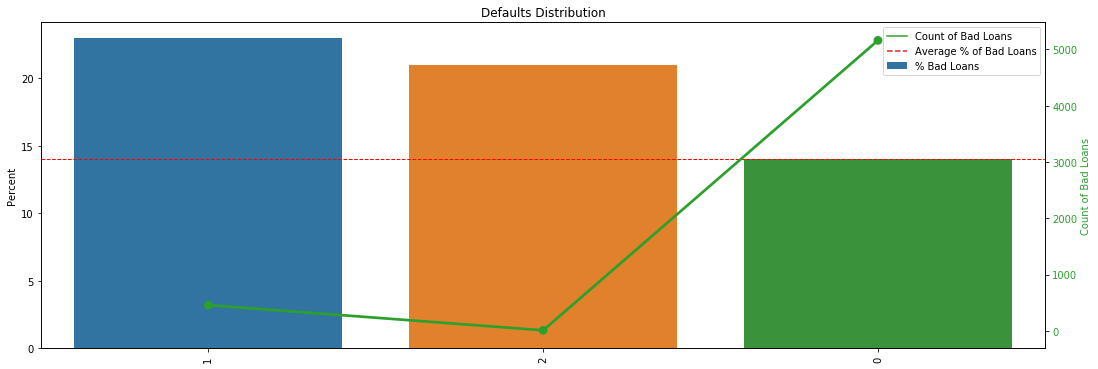

   pub_rec  totals  count  rate
0  1        2013    457    23.0
1  2        48      10     21.0
2  0        36507   5160   14.0


In [56]:
# is there any relation w.r.t pub_rec and default rate
group_and_default_rate('pub_rec')
# on expected lines - people with 1/2 pub_recs have higher default rate.

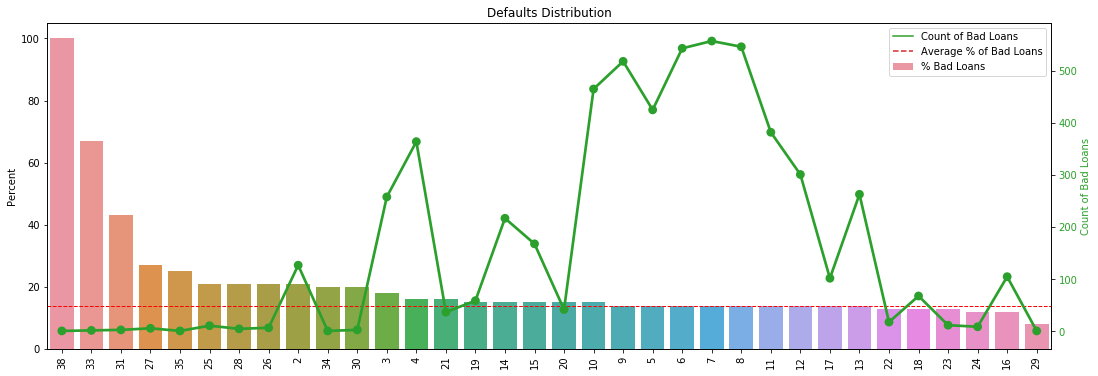

   open_acc  totals  count   rate
0  38        1       1      100.0
1  33        3       2      67.0 
2  31        7       3      43.0 
3  27        22      6      27.0 
4  35        4       1      25.0 


In [57]:
# is there any relation w.r.t open_acc and default rate
group_and_default_rate('open_acc')
# not sure what to make out of it.

### Bivariate Analysis

In [58]:
bivariate_loan_data = loan_data[['addr_state', 'verification_status', 'purpose', 'home_ownership',
                                           'emp_title', 'term', 'emp_length', 'grade', 'sub_grade',
                                           'loan_status', 'pub_rec', 'issue_d', 'inq_last_6mths',
                                           'pub_rec_bankruptcies', 'delinq_2yrs', 'open_acc',
                                           'int_rate', 'loan_amnt', 'installment',
                                           'dti', 'funded_amnt', 'annual_inc']]
bivariate_loan_data.head()

addr_state verification_status         purpose home_ownership  \
0  AZ         Verified            credit_card     RENT            
1  GA         Source Verified     car             RENT            
2  IL         Not Verified        small_business  RENT            
3  CA         Source Verified     other           RENT            
5  AZ         Source Verified     wedding         RENT            

              emp_title        term emp_length grade sub_grade  loan_status  \
0  NaN                    36 months  10+ years  B     B2        Fully Paid    
1  Ryder                  60 months  < 1 year   C     C4        Charged Off   
2  NaN                    36 months  10+ years  C     C5        Fully Paid    
3  AIR RESOURCES BOARD    36 months  10+ years  C     C1        Fully Paid    
5  Veolia Transportaton   36 months  3 years    A     A4        Fully Paid    

   pub_rec issue_d  inq_last_6mths  pub_rec_bankruptcies  delinq_2yrs  \
0  0        Dec-11  1               0.0                   0             
1  0        Dec-11  5               0.0                   0             
2  0        Dec-11  2               0.0                   0             
3  0        Dec-11  1               0.0                   0             
5  0        Dec-11  3               0.0                   0             

   open_acc  int_rate  loan_amnt  installment    dti  funded_amnt  annual_inc  
0  3         10.65     5000       162.87       27.65  5000         24000.0     
1  3         15.27     2500       59.83        1.00   2500         30000.0     
2  2         15.96     2400       84.33        8.72   2400         12252.0     
3  10        13.49     10000      339.31       20.00  10000        49200.0     
5  9         7.90      5000       156.46       11.20  5000         36000.0

/home/shakeeb/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shakeeb/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


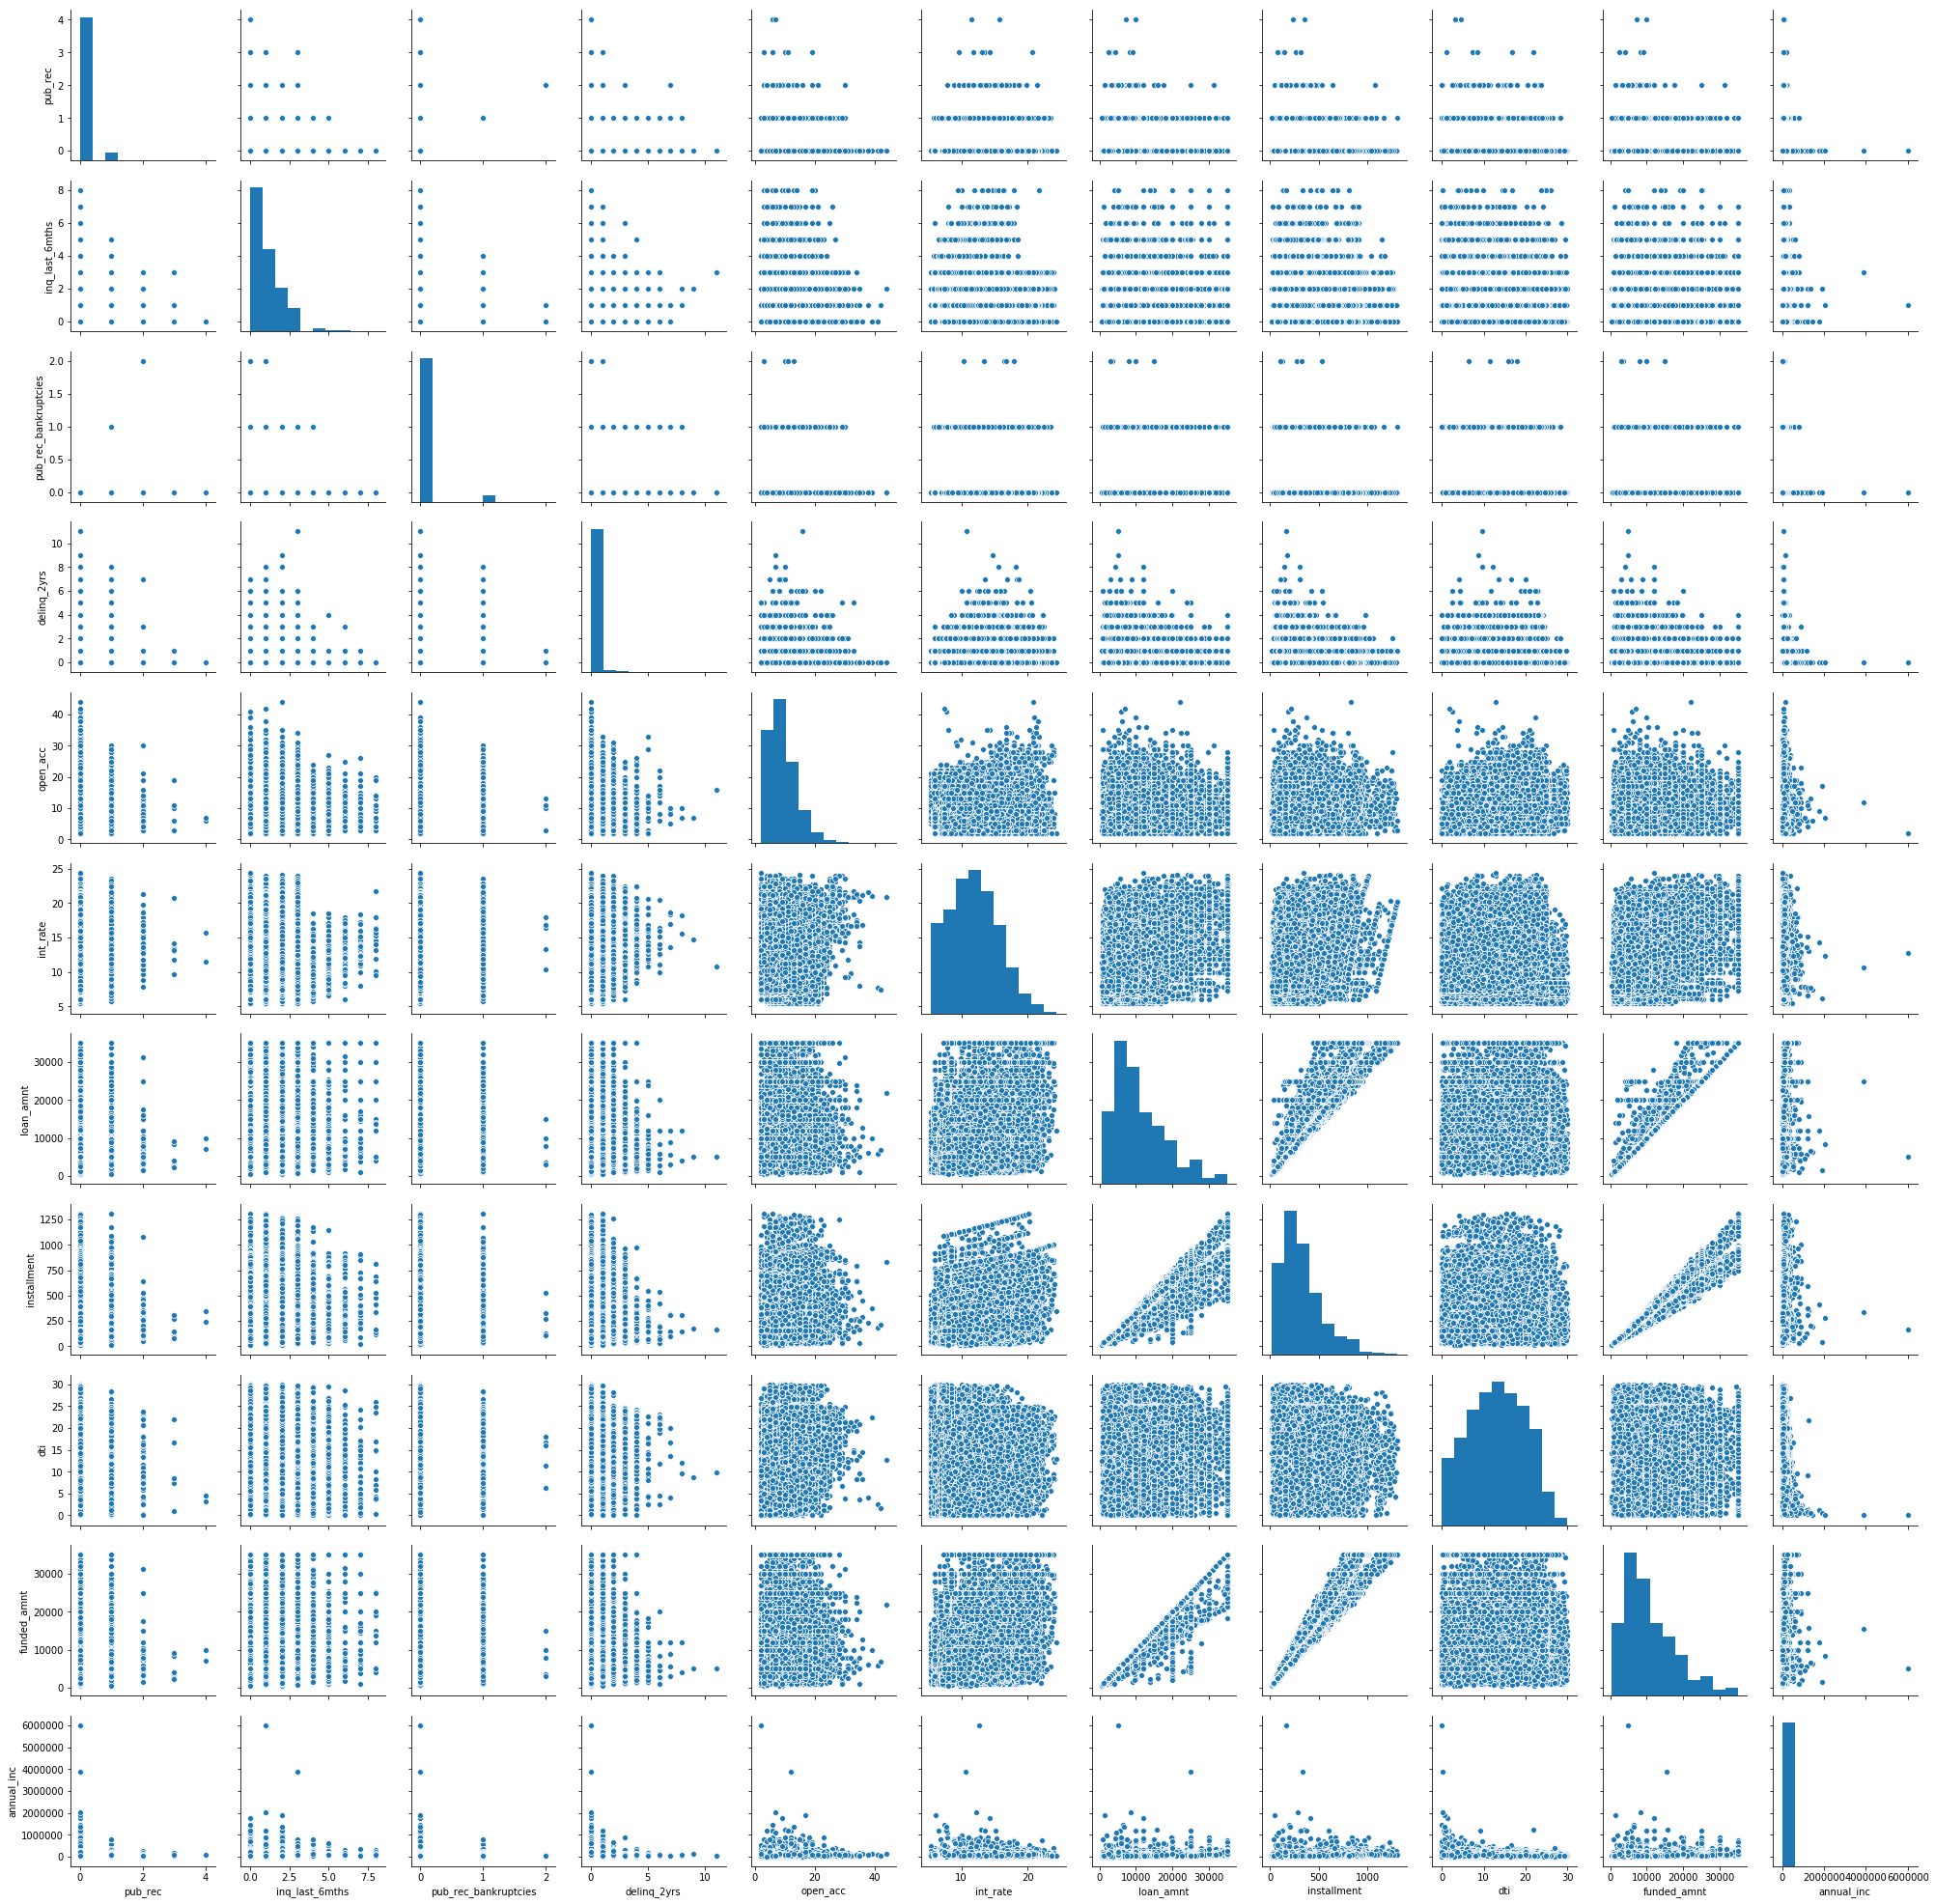

In [59]:
# sns.pairplot(bivariate_loan_data)

In [60]:
bivariate_loan_data[['int_rate', 'loan_status']].head()

int_rate  loan_status
0  10.65     Fully Paid 
1  15.27     Charged Off
2  15.96     Fully Paid 
3  13.49     Fully Paid 
5  7.90      Fully Paid

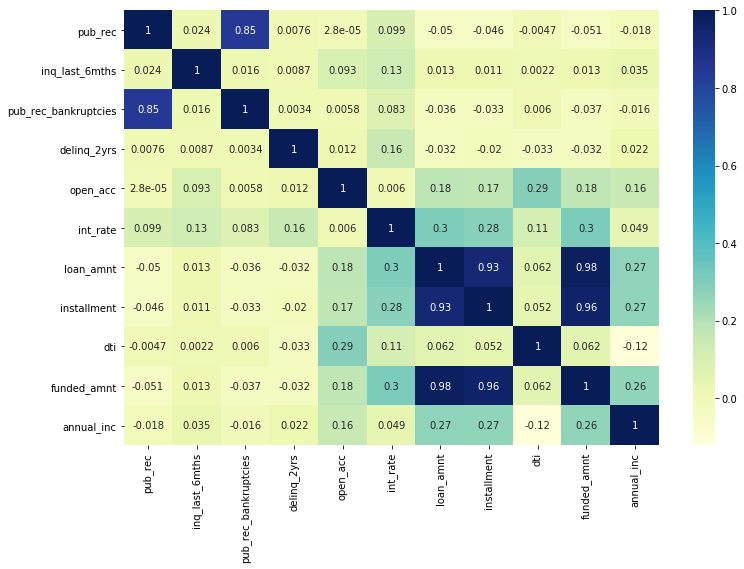

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(bivariate_loan_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# pub_rec and pub_rec_bankruptcies are highly correlated, we could drop one of them
# loan_amount, installment, funded_amount also are highly correlated, pick one

In [62]:
# dti - debt(excluding current loan)/income and installment vs loan_status

In [65]:
def heat_map_bivariate(cols, size=(12, 4)):
    # grade and term vs loan_status
    p_table = loan_data.groupby(cols+['loan_status']).count()[['loan_amnt']]
    # p_table = p_table.reset_index()
    totals_table = p_table.groupby(cols).sum()

    p_table = p_table.join(totals_table, how='inner', rsuffix="_l").reset_index()
    p_table = p_table.rename(columns={'loan_amnt_l':'total', 'loan_amnt':'count'})
    # p_table.head()

    p_table['rate'] = round(100*(p_table['count']/p_table['total']))
    # p_table.head()

    df = p_table.pivot_table(values='rate',index='loan_status',columns=cols)
    # df.head()

    plt.figure(figsize=size)
    sns.heatmap(df, cmap="YlGnBu", annot=True)
    plt.show()

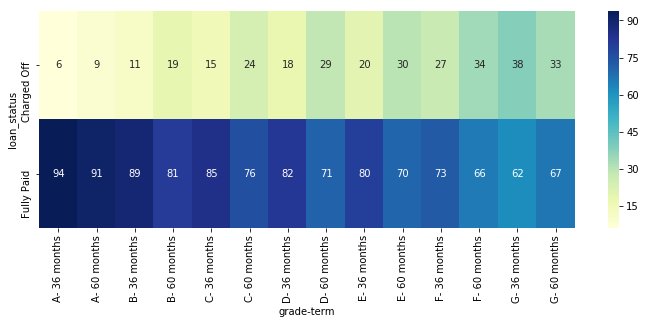

In [66]:
heat_map_bivariate(['grade', 'term'])
# Grade G with 36 months term has higher default rate

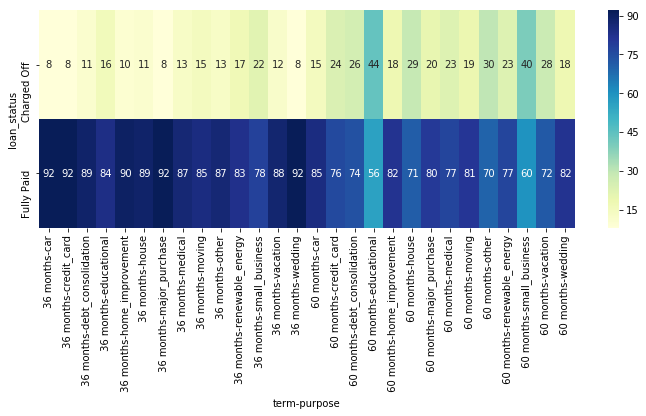

In [67]:
heat_map_bivariate(['term', 'purpose'])
# riskier loans - 60months-educational, 60months-small_business

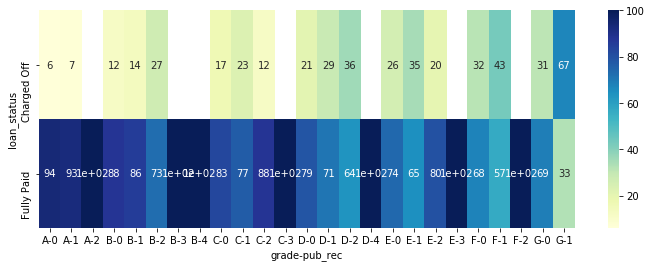

In [68]:
heat_map_bivariate(['grade', 'pub_rec'])
# G with 1 rec, F with 1 rec
# very interesting - gaps in charged off - means no default - 3,4 rec - reformed?

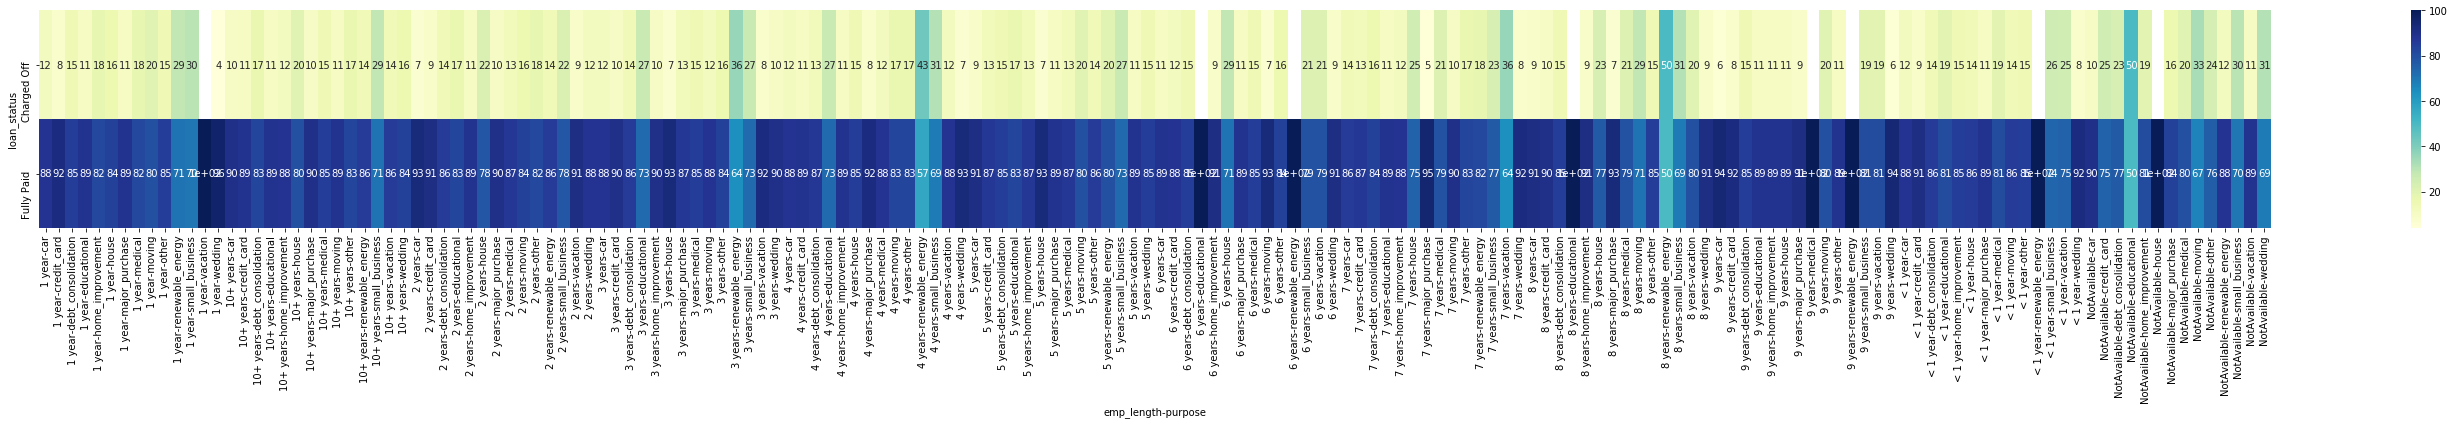

In [69]:
heat_map_bivariate(['emp_length', 'purpose'], size=(50, 4))
# interesting - 7years - vacation!
# buying house with 6years exp

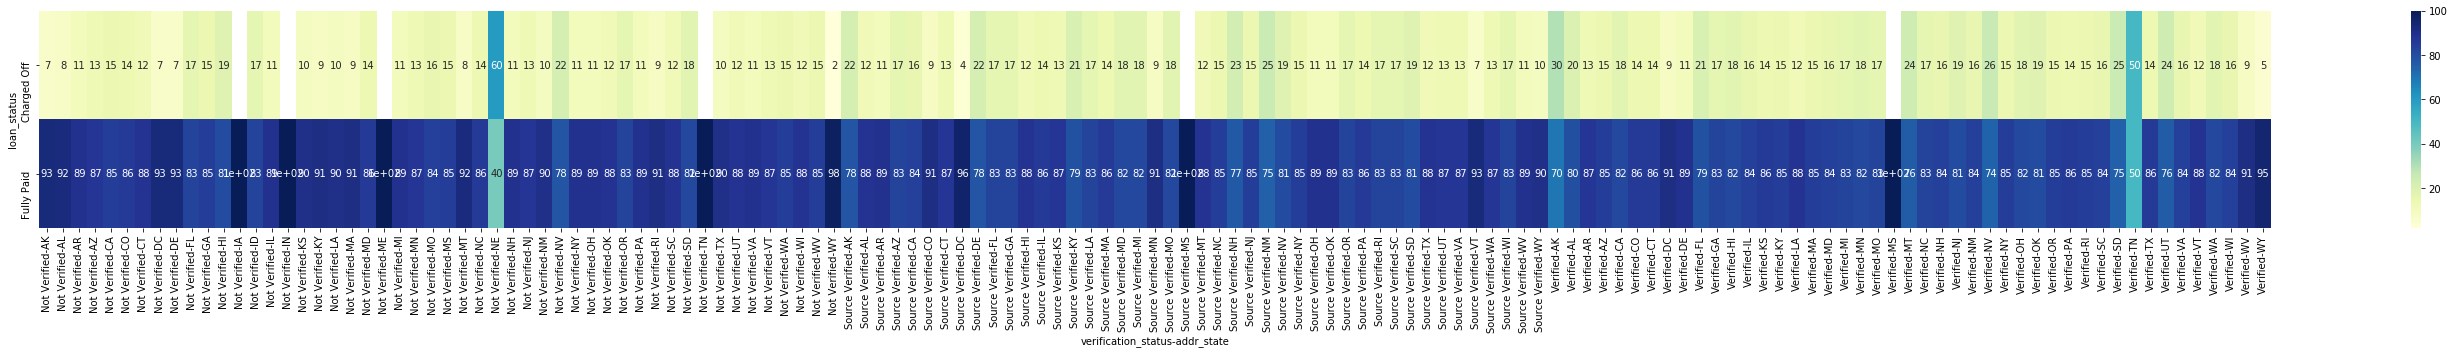

In [70]:
heat_map_bivariate(['verification_status', 'addr_state'], size=(50, 4))
# not verified in nebraska - high risk
# verified in tenneessee - high risk - insider play :) ?

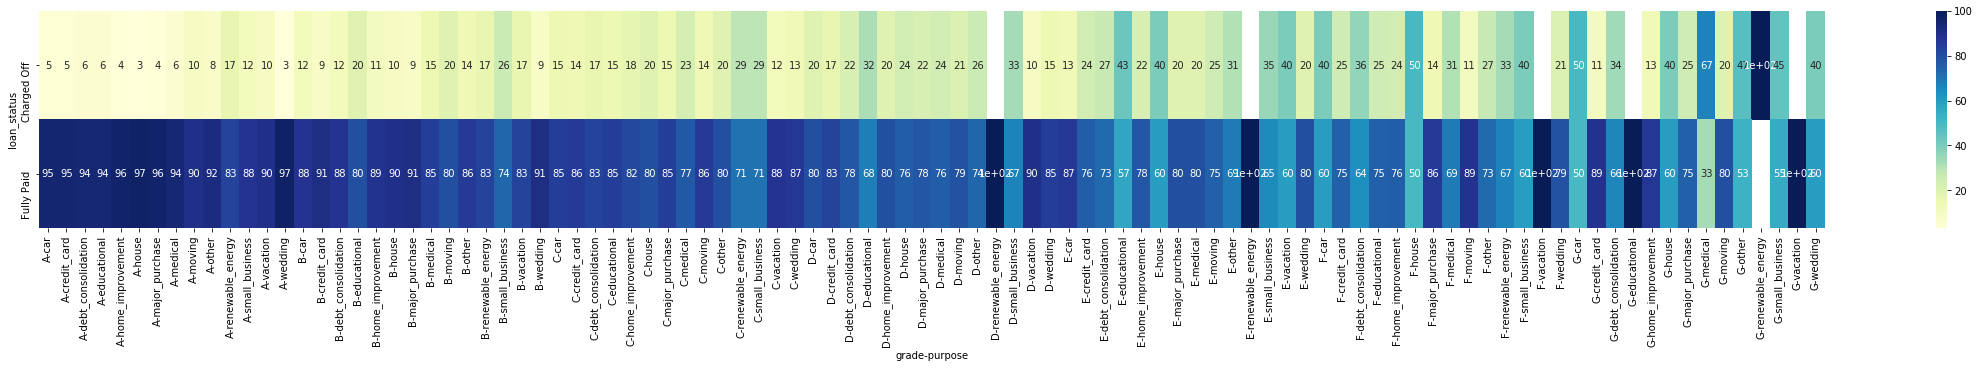

In [71]:
heat_map_bivariate(['grade', 'purpose'], size=(40, 4))
# G-renewable energy - 100% default!
# G - medical, car, F-house
# G - vacation is least risky!
# This looks like very imp insight

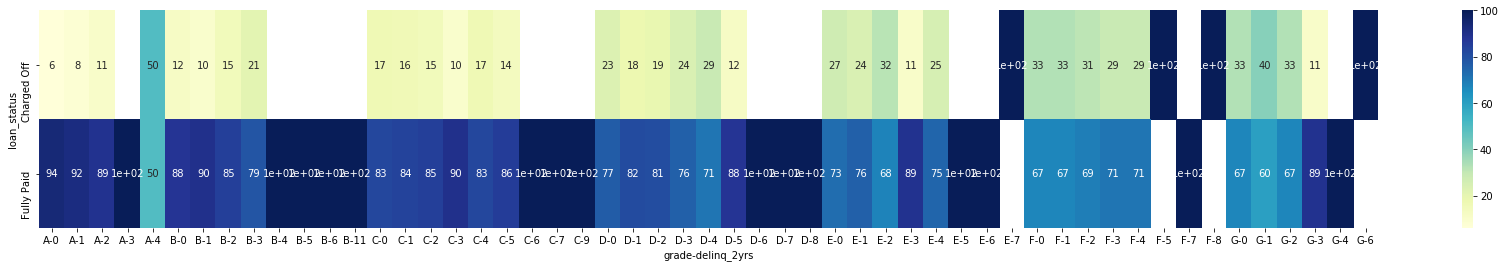

In [72]:
heat_map_bivariate(['grade', 'delinq_2yrs'], size=(30, 4))
# A grade with 4 delinqencies

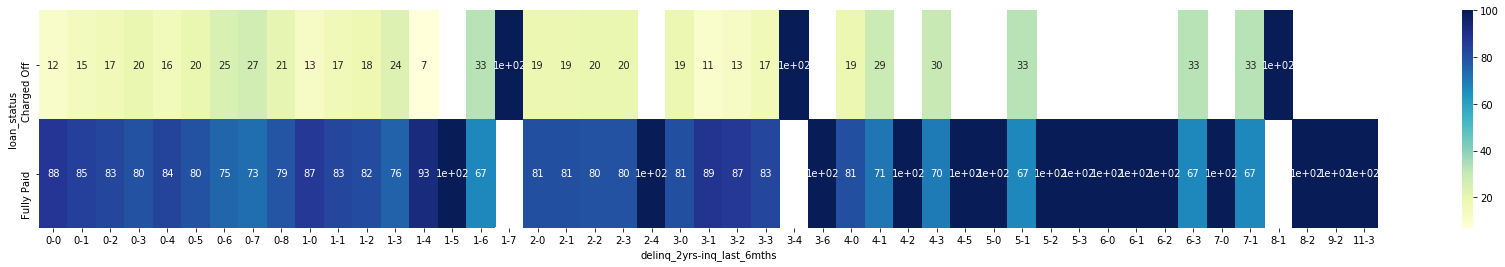

In [73]:
heat_map_bivariate(['delinq_2yrs', 'inq_last_6mths'], size=(30, 4))

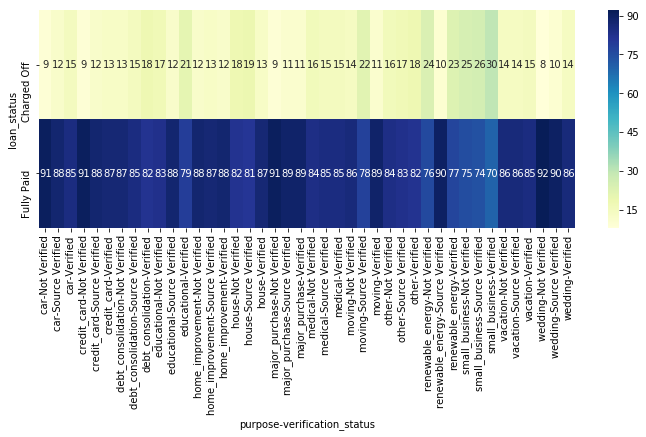

In [74]:
heat_map_bivariate(['purpose', 'verification_status'])
# renewable and moving - source verified is risky

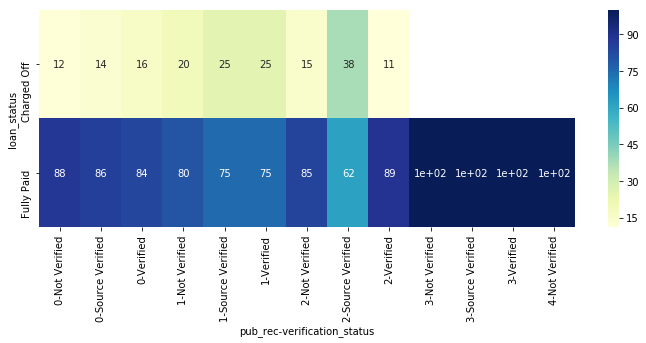

In [75]:
heat_map_bivariate(['pub_rec', 'verification_status'])
# anyway more than pub_rec are generally safe and 2 with verified status is also safe?

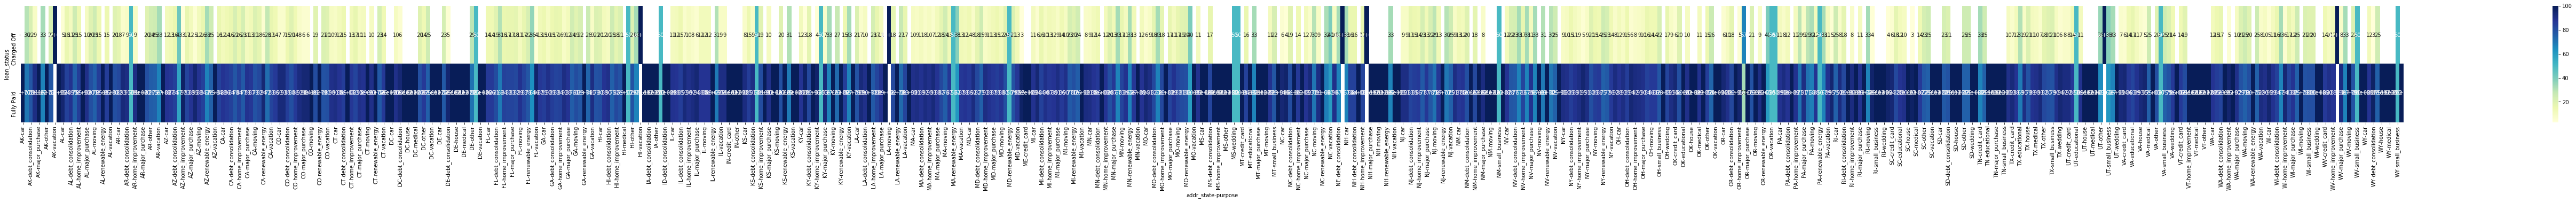

In [76]:
heat_map_bivariate(['addr_state', 'purpose'], size=(100, 4))
# figure out how to display this, seems to have some good info

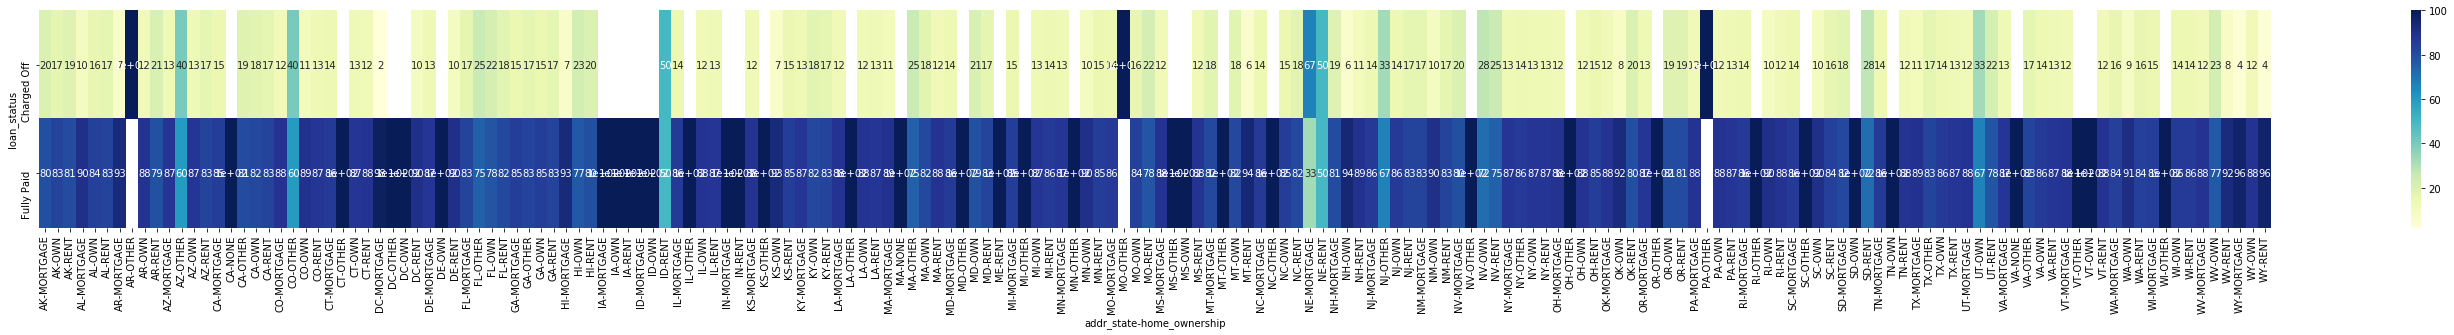

In [77]:
heat_map_bivariate(['addr_state', 'home_ownership'], size=(50, 4))
# ID - rental have high rate

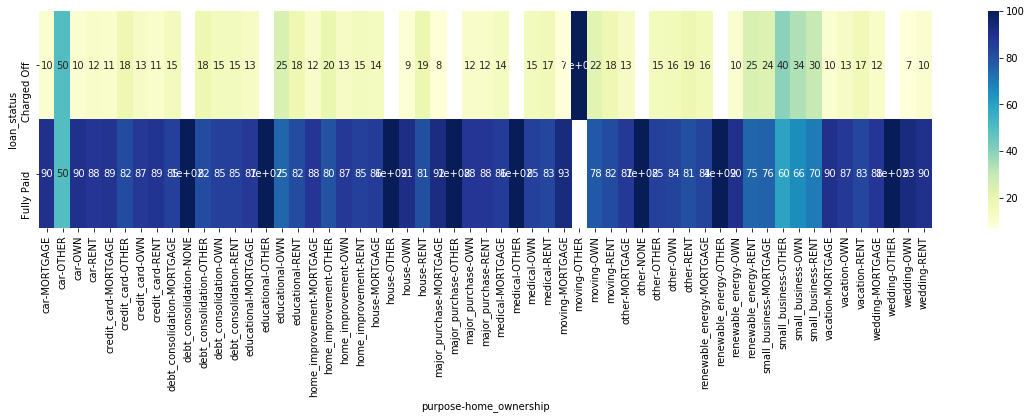

In [78]:
heat_map_bivariate(['purpose', 'home_ownership'], size=(20, 4))
# home improvemnt loan and other - what does it mean?

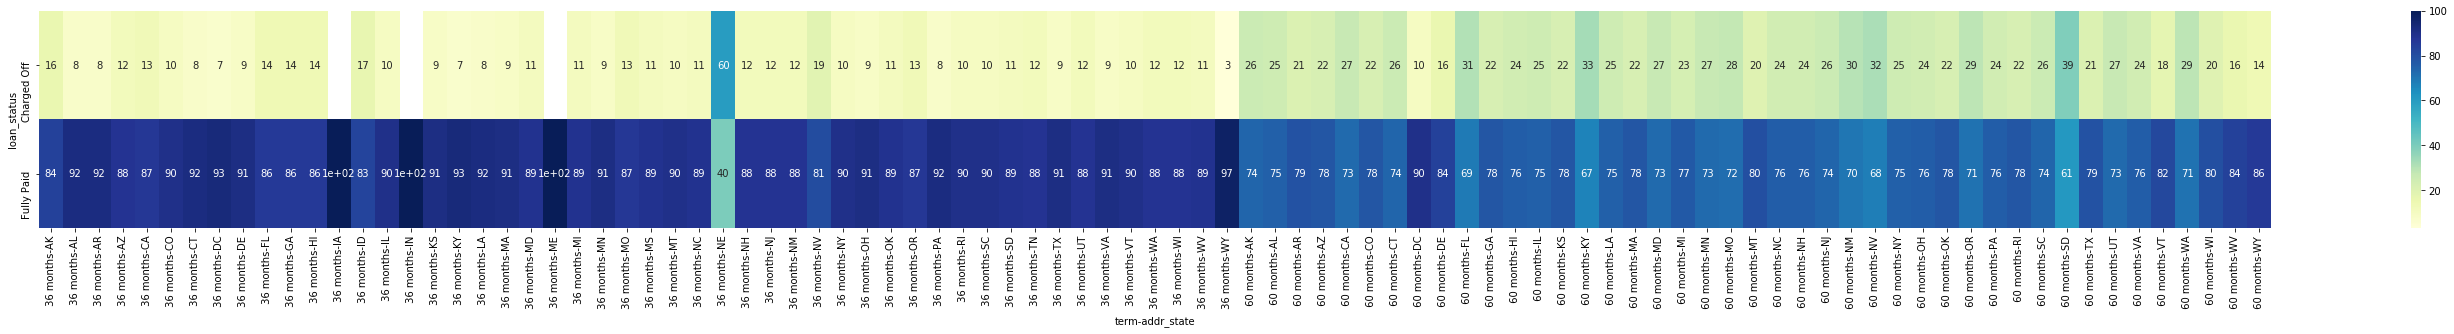

In [79]:
heat_map_bivariate(['term', 'addr_state'], size=(50, 4))
# 36 months term in nebraska is risky

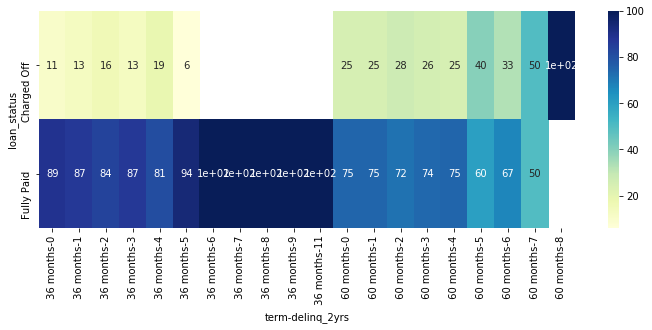

In [80]:
heat_map_bivariate(['term', 'delinq_2yrs'])
# for 36 term - more number of delinq - less rate
# for 60months inverse of above

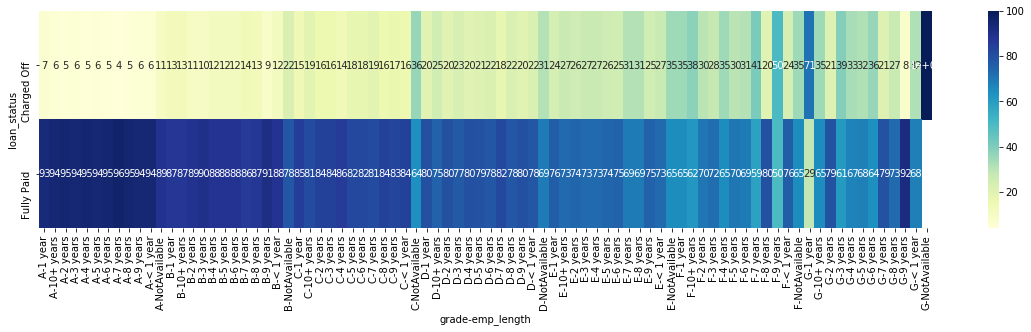

In [81]:
heat_map_bivariate(['grade', 'emp_length'], size=(20, 4))
# 1year - G - risky

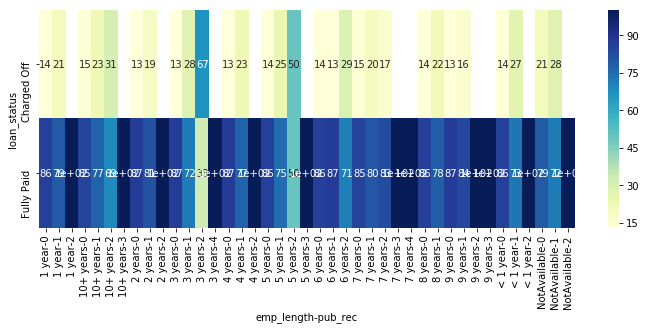

In [82]:
heat_map_bivariate(['emp_length', 'pub_rec'])
# 3 and 5 years - 2pub rec

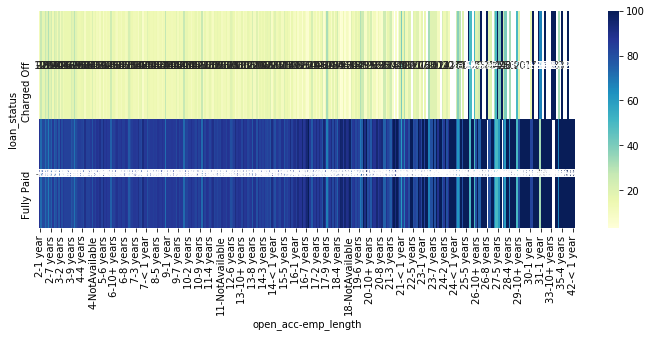

In [83]:
heat_map_bivariate(['open_acc', 'emp_length'])
# high num of accs with less experience is a risky proposition!

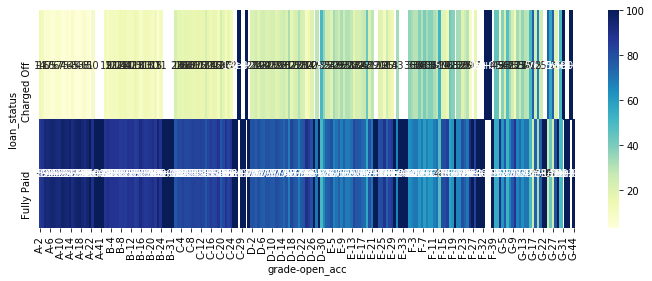

In [84]:
heat_map_bivariate(['grade', 'open_acc'])
# relatively safer with worse grades and less open accounts

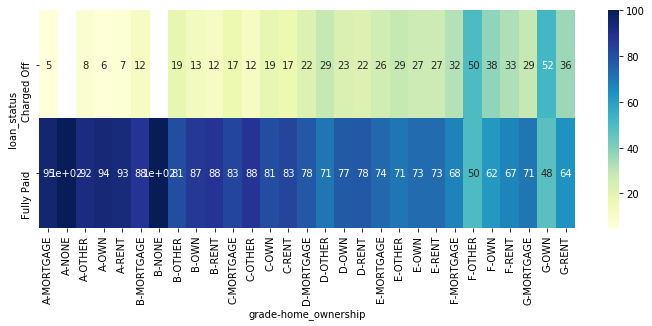

In [85]:
heat_map_bivariate(['grade', 'home_ownership'])
# G with own house is also risky

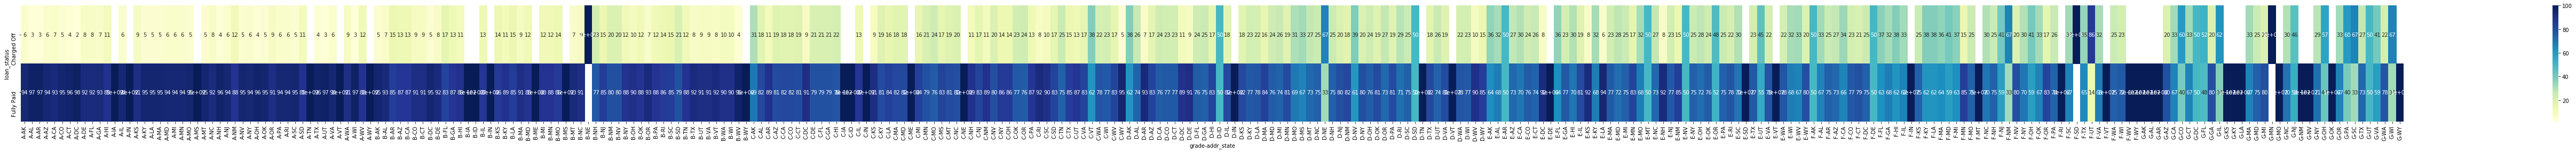

In [86]:
heat_map_bivariate(['grade', 'addr_state'], size=(100, 4))
# there are some states where good grades are also risky

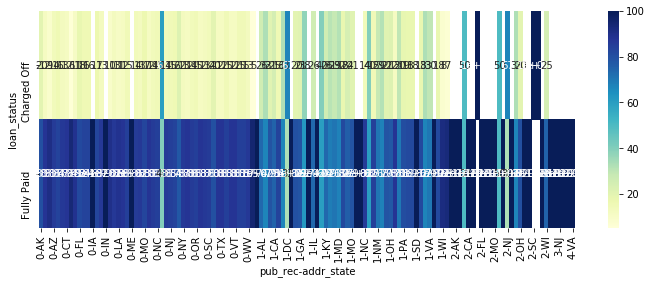

In [87]:
heat_map_bivariate(['pub_rec', 'addr_state'])
# nv with 0 records is also risky

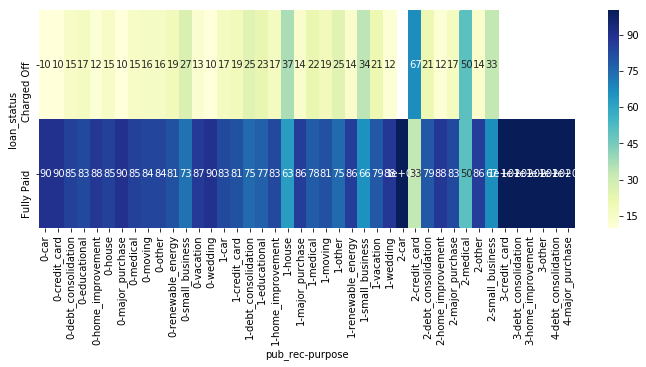

In [88]:
heat_map_bivariate(['pub_rec', 'purpose'])
# good indications here

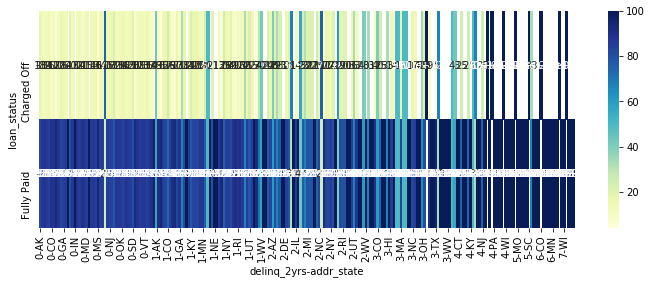

In [89]:
heat_map_bivariate(['delinq_2yrs', 'addr_state'])
# some state with even 0 delinquencies have high rate

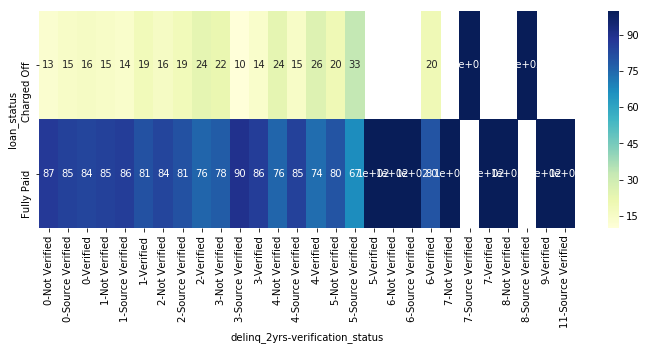

In [90]:
heat_map_bivariate(['delinq_2yrs', 'verification_status'])
# verified and source verified are higher risk for less number of delinquencies - fowl play?

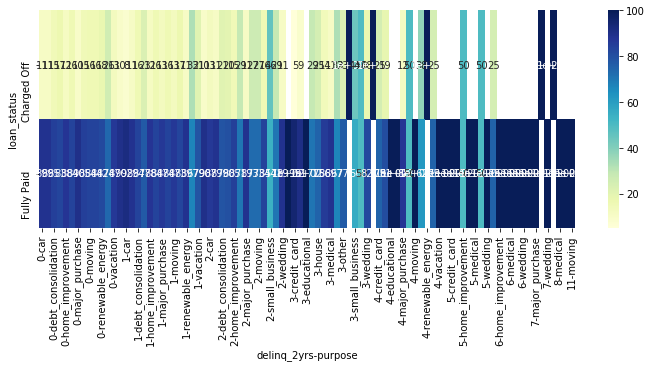

In [91]:
heat_map_bivariate(['delinq_2yrs', 'purpose'])
# even with higher delinquencies, there are some loan types which are safer

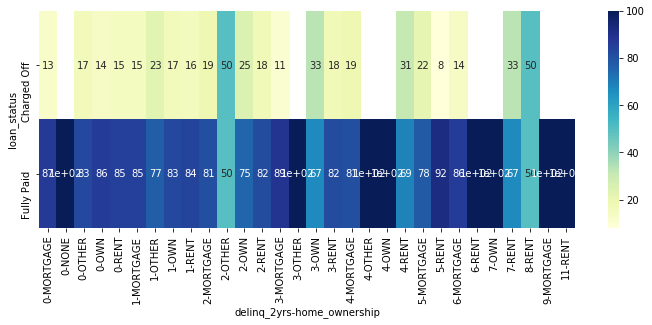

In [92]:
heat_map_bivariate(['delinq_2yrs', 'home_ownership'])
# others are at higher risk even with less delinq

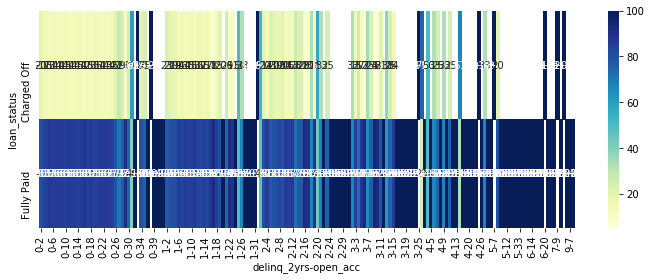

In [93]:
heat_map_bivariate(['delinq_2yrs', 'open_acc'])
# higher accs with low delinq also risky

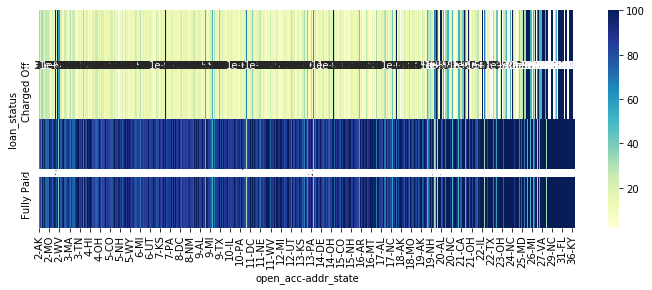

In [94]:
heat_map_bivariate(['open_acc', 'addr_state'])
# some states where large open acc is not much risk

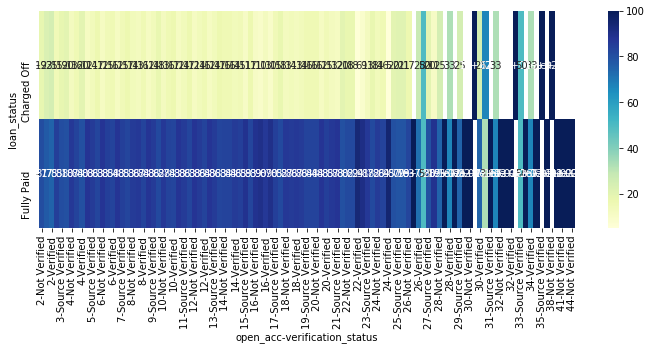

In [95]:
heat_map_bivariate(['open_acc', 'verification_status'])
# high num of accs and not verified is risky

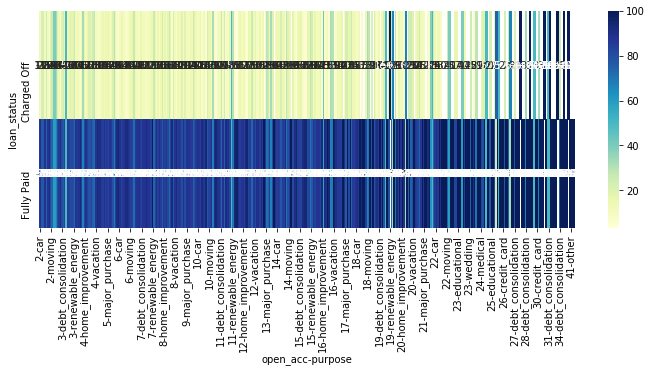

In [96]:
heat_map_bivariate(['open_acc', 'purpose'])
# some purposes where high open accs is less risky

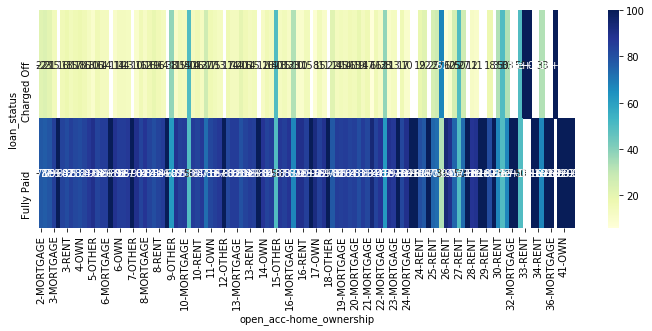

In [97]:
heat_map_bivariate(['open_acc', 'home_ownership'])

### Derived metrics

In [98]:
derived_metris_loan_data = loan_data[['issue_d', 'dti', 'int_rate', 'loan_amnt', 
                                                'installment', 'annual_inc', 'loan_status']]
derived_metris_loan_data.head()

issue_d    dti  int_rate  loan_amnt  installment  annual_inc  loan_status
0  Dec-11  27.65  10.65     5000       162.87       24000.0     Fully Paid 
1  Dec-11  1.00   15.27     2500       59.83        30000.0     Charged Off
2  Dec-11  8.72   15.96     2400       84.33        12252.0     Fully Paid 
3  Dec-11  20.00  13.49     10000      339.31       49200.0     Fully Paid 
5  Dec-11  11.20  7.90      5000       156.46       36000.0     Fully Paid

In [99]:
derived_metris_loan_data['month'] = pd.to_datetime(derived_metris_loan_data['issue_d'], format='%b-%y').dt.strftime('%b')
derived_metris_loan_data.head()

/home/shakeeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


issue_d    dti  int_rate  loan_amnt  installment  annual_inc  loan_status  \
0  Dec-11  27.65  10.65     5000       162.87       24000.0     Fully Paid    
1  Dec-11  1.00   15.27     2500       59.83        30000.0     Charged Off   
2  Dec-11  8.72   15.96     2400       84.33        12252.0     Fully Paid    
3  Dec-11  20.00  13.49     10000      339.31       49200.0     Fully Paid    
5  Dec-11  11.20  7.90      5000       156.46       36000.0     Fully Paid    

  month  
0  Dec   
1  Dec   
2  Dec   
3  Dec   
5  Dec

  month  loan_status  count  total  default_rate
0  Apr   Charged Off  370    2831   13.0        
1  Apr   Fully Paid   2461   2831   87.0        
2  Aug   Charged Off  468    3388   14.0        
3  Aug   Fully Paid   2920   3388   86.0        
4  Dec   Charged Off  678    4215   16.0        


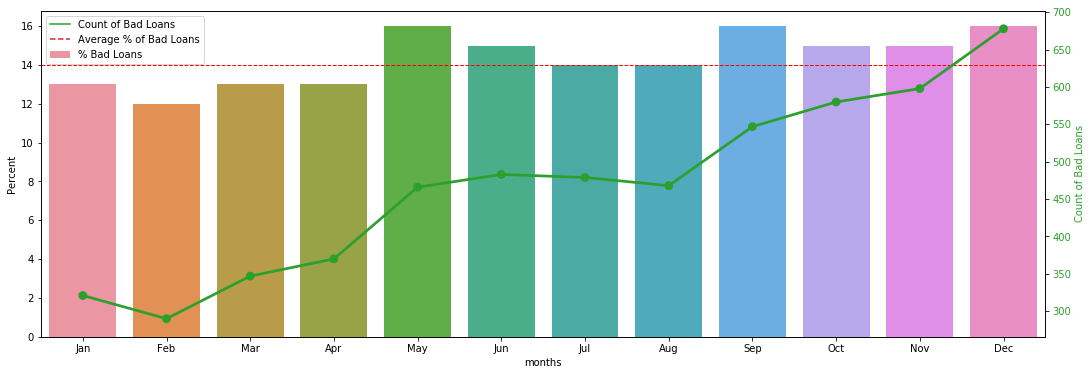

In [100]:
# group by month and loan status
# Set labels
pxlabel='months'
pylabel='Percent'
py2label = 'Count of Bad Loans'

month_df = derived_metris_loan_data.groupby(['month', 'loan_status']).count()[['issue_d']].reset_index()
month_df = month_df.rename(columns={'issue_d':'count'})
totals_df = month_df.groupby('month').sum()['count']
month_df['total'] = month_df['month'].apply(lambda x: totals_df.loc[x])
month_df['default_rate'] = round(100*(month_df['count']/month_df['total']))
print(month_df.head())

month_df = month_df[month_df['loan_status'] == 'Charged Off']
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(18, 6))
sns.barplot(x='month', y='default_rate', data=month_df, label='% Bad Loans', order=months_order)

# plt.xticks(rotation=90)
# plt.title(ptitle)
plt.xlabel(pxlabel)
plt.ylabel(pylabel)   
# Plot Charged off loans guideline i.e. 14% 
plt.axhline(y=14, linewidth=1.00, color='r', ls='--')

# Hack to add 2nd Chart legend to primary and we supress the 2nd
plt.plot(np.nan, color='tab:green', label = 'Count of Bad Loans')
plt.plot(np.nan, color='tab:red',ls='--', label = 'Average % of Bad Loans')
plt.legend()

# Create 2nd line chart of count count of corresponding bad loans - Right hand chart 
plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
plt2.tick_params(axis='y', labelcolor='tab:green')
sns.pointplot(x='month', y='count', data=month_df, color='tab:green', marker='o', ax=plt2, label='Count', order=months_order)
plt2.set_ylabel(py2label, color='tab:green')  # we already handled the x-label with ax1

plt.show()

### Insight
Last quarter of year is risky with high defaults rate and the counts as well

count    38577.000000
mean     13.272727   
std      6.673044    
min      0.000000    
25%      8.130000    
50%      13.370000   
75%      18.560000   
max      29.990000   
Name: dti, dtype: float64


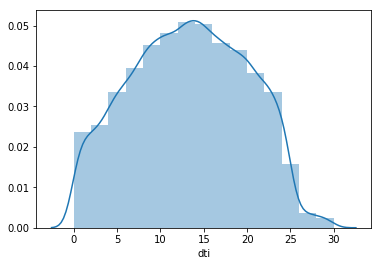

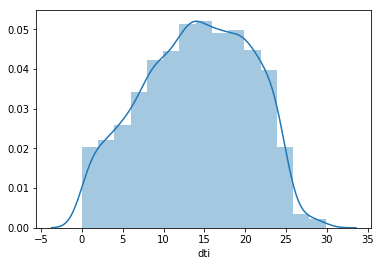

In [101]:
print(derived_metris_loan_data['dti'].describe())

sns.distplot(derived_metris_loan_data['dti'], bins=15)
plt.show()

sns.distplot(derived_metris_loan_data[derived_metris_loan_data['loan_status']=='Charged Off']['dti'], bins=15)
plt.show()